<a href="https://colab.research.google.com/github/arka57/Hotel-Booking-EDA/blob/main/Hotel_Booking_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name--Hotel Booking EDA**

In [1]:
#Project Type - EDA
#Contribution - Individual

# **Problem Statement**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.

# **Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
cd My\Drive/Hotel Booking EDA

/gdrive/MyDrive/Hotel Booking EDA


In [4]:
ls

hotel_bookings.csv


# **Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Dataset Loading**

In [6]:
df=pd.read_csv("hotel_bookings.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **Dataset First View**

In [7]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


# **Dataset Rows & Columns count**

In [8]:
df.shape

(119390, 32)

# **Dataset Information**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Duplicate Values**

In [10]:
len(df[df.duplicated()])

31994

In [11]:
df1=df.copy()

In [12]:
df1=df1.drop_duplicates()

In [13]:
len(df1[df1.duplicated()])

0

# **Missing Values/Null Values**

In [14]:
df1.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [15]:
(df1.isnull().sum()/len(df1))*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004577
babies                             0.000000
meal                               0.000000
country                            0.517186
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [16]:
df1['company'].isnull().sum()

82137

# **Treating NULL/missing  values**

In [17]:
#company has 93% null values so the column will be dropped
#children is actually categorical.So mode is 0 will be used as replacement for null values
#country has 2 options--replace with "Other"
#agent has 13% null values. Replaced with median values as continuos

<Axes: xlabel='agent', ylabel='Count'>

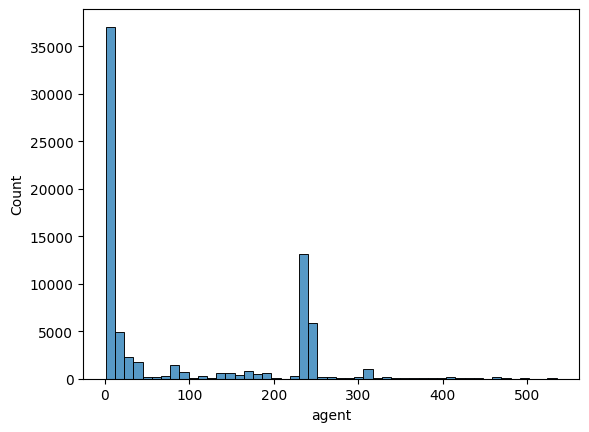

In [18]:
sns.histplot(df1['agent'])

<Axes: xlabel='children', ylabel='Count'>

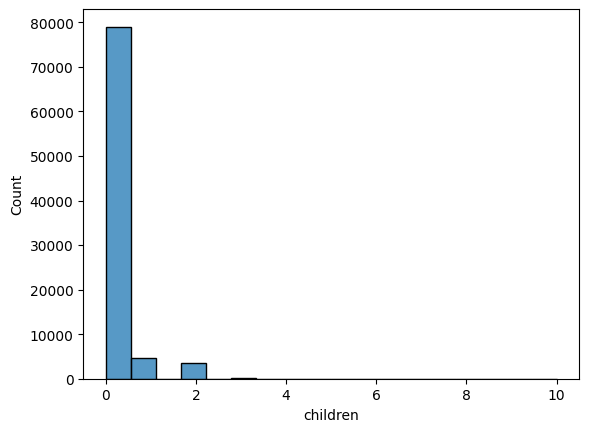

In [19]:
sns.histplot(df1['children'])

In [20]:
df1['children'].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [21]:
df1['country'].isnull().sum()

452

In [22]:
#Dropping Company

In [23]:
df1.drop("company",axis=1,inplace=True)

In [24]:
#Replacing the null values for children,agent,country

In [25]:
df1['children']=df1['children'].fillna(value=0)
df1['agent']=df1['agent'].fillna(value=df1['agent'].median())
df1['country']=df1['country'].fillna(value="Other")

## **Variables Description**

Description of individual Variable
The columns and the data it represents are listed below:

hotel : Name of the hotel (Resort Hotel or City Hotel)

is_canceled : If the booking was canceled (1) or not (0)

lead_time: Number of days before the actual arrival of the guests

arrival_date_year : Year of arrival date

arrival_date_month : Month of month arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

stays_in_week_nights : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

adults : Number of adults among guests

children : Number of children among guests

babies : Number of babies among guests

meal : Type of meal booked

country : Country of guests

market_segment : Designation of market segment

distribution_channel : Name of booking distribution channel

is_repeated_guest : If the booking was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved

assigned_room_type : Code of room type assigned

booking_changes : Number of changes/amendments made to the booking

deposit_type : Type of the deposit made by the guest

agent : ID of travel agent who made the booking

company : ID of the company that made the booking

days_in_waiting_list : Number of days the booking was in the waiting list

customer_type : Type of customer, assuming one of four categories

adr : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests : Number of special requests made by the customer

reservation_status : Reservation status (Canceled, Check-Out or No-Show)

reservation_status_date : Date at which the last reservation status was updated

# **Understanding and Analysing Variables**

**Reservation_Status**

In [26]:
df1['reservation_status'].value_counts()

Check-Out    63371
Canceled     23011
No-Show       1014
Name: reservation_status, dtype: int64

In [27]:
plt.figure(figsize=(20,5))

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='reservation_status', ylabel='count'>

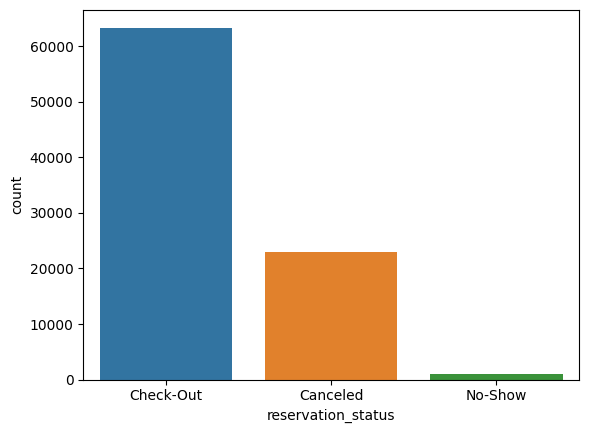

In [28]:
sns.countplot(x='reservation_status',data=df1)

In [29]:
#reservation_status showing whether the cient actually came to hotel or cancelled or had a no show. Mostly between check out and cancelled. Very few are No SHow

**is_cancelled**

In [30]:
df1['is_canceled'].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

<Axes: xlabel='is_canceled', ylabel='count'>

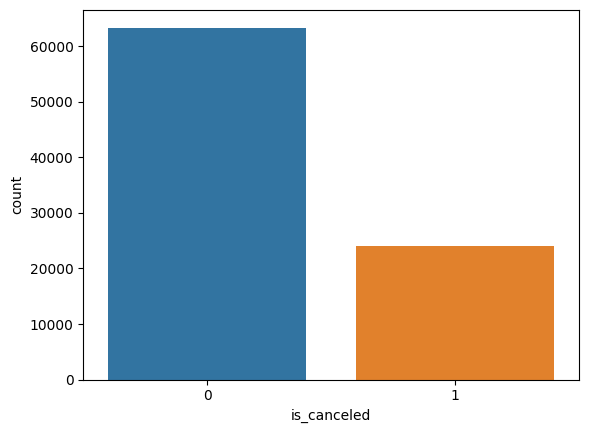

In [31]:
sns.countplot(x='is_canceled',data=df1)

In [32]:
#IS_CANCELED: same as reservation status. just no show also treated as cancelled

**hotel**

In [33]:
df1['hotel'].value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

<Axes: xlabel='hotel', ylabel='count'>

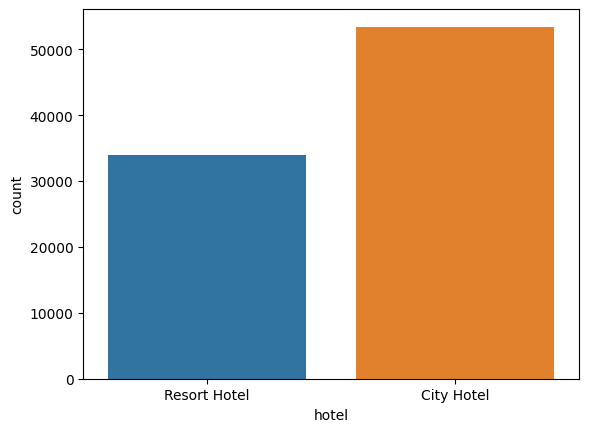

In [34]:
sns.countplot(x='hotel',data=df1)

In [35]:
#More City Hotel Bookings are done in comparison to Resort Hotel

In [36]:
df2=df1.groupby(['hotel','is_canceled'])['lead_time'].count().reset_index()
df2.head()


,hotel,is_canceled,lead_time
0,City Hotel,0,37379
1,City Hotel,1,16049
2,Resort Hotel,0,25992
3,Resort Hotel,1,7976


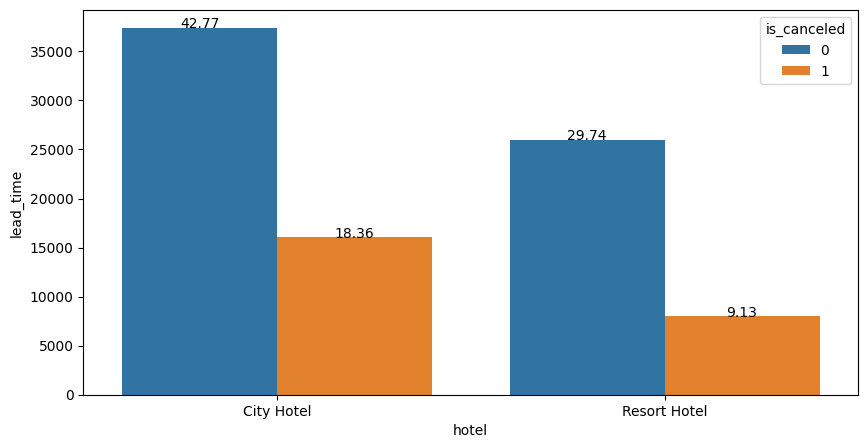

In [37]:
total=sum(df2['lead_time'])
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='hotel',y='lead_time',hue='is_canceled',data=df2)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height*100/total), ha="center")

In [38]:
#So more City Hotels are prone to cancelling comapared to Resort Hotels

** Columns Regarding stay nights**

In [39]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [40]:
#Creating new column total stay as sum of weekend nights and week nights

In [41]:
df1['total_stay']=df1['stays_in_week_nights']+df1['stays_in_weekend_nights']

In [42]:
#Creating Column any_weekend_night_stay

In [43]:
df1['weekend_night']=df1['stays_in_weekend_nights'].apply(lambda x: 1 if x>0 else 0)

# **Analysing Date related columns**

In [44]:
df3=df1.groupby('arrival_date_year')['hotel'].count().reset_index()

<Axes: xlabel='arrival_date_year', ylabel='hotel'>

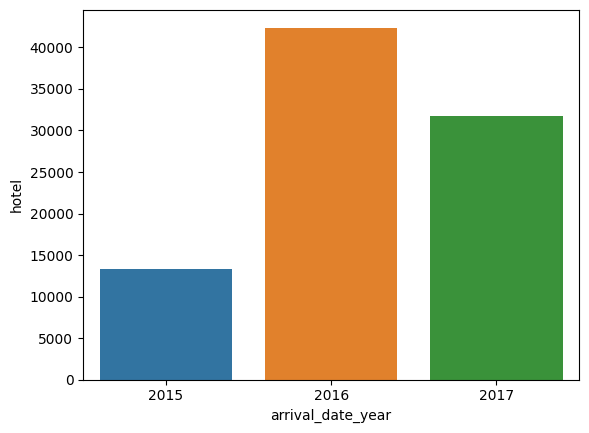

In [45]:
sns.barplot(x='arrival_date_year',y='hotel',data=df3)

In [46]:
#On a preliminary investigation hotel booking increased from 2015 to 2016 and then decreased on 2017

In [47]:
df4=df1.groupby(['arrival_date_year','is_canceled'])['hotel'].count().reset_index()

<Axes: xlabel='arrival_date_year', ylabel='hotel'>

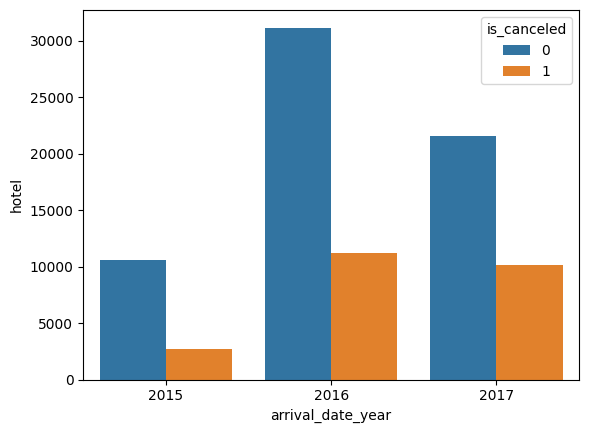

In [48]:
sns.barplot(x='arrival_date_year',y='hotel',hue='is_canceled',data=df4)

In [49]:
#more % of hotels are cancelled in 2016 and 2017

In [50]:
df3=df1.groupby('arrival_date_month')['hotel'].count().reset_index()

In [51]:
month=['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

<Axes: xlabel='arrival_date_month', ylabel='hotel'>

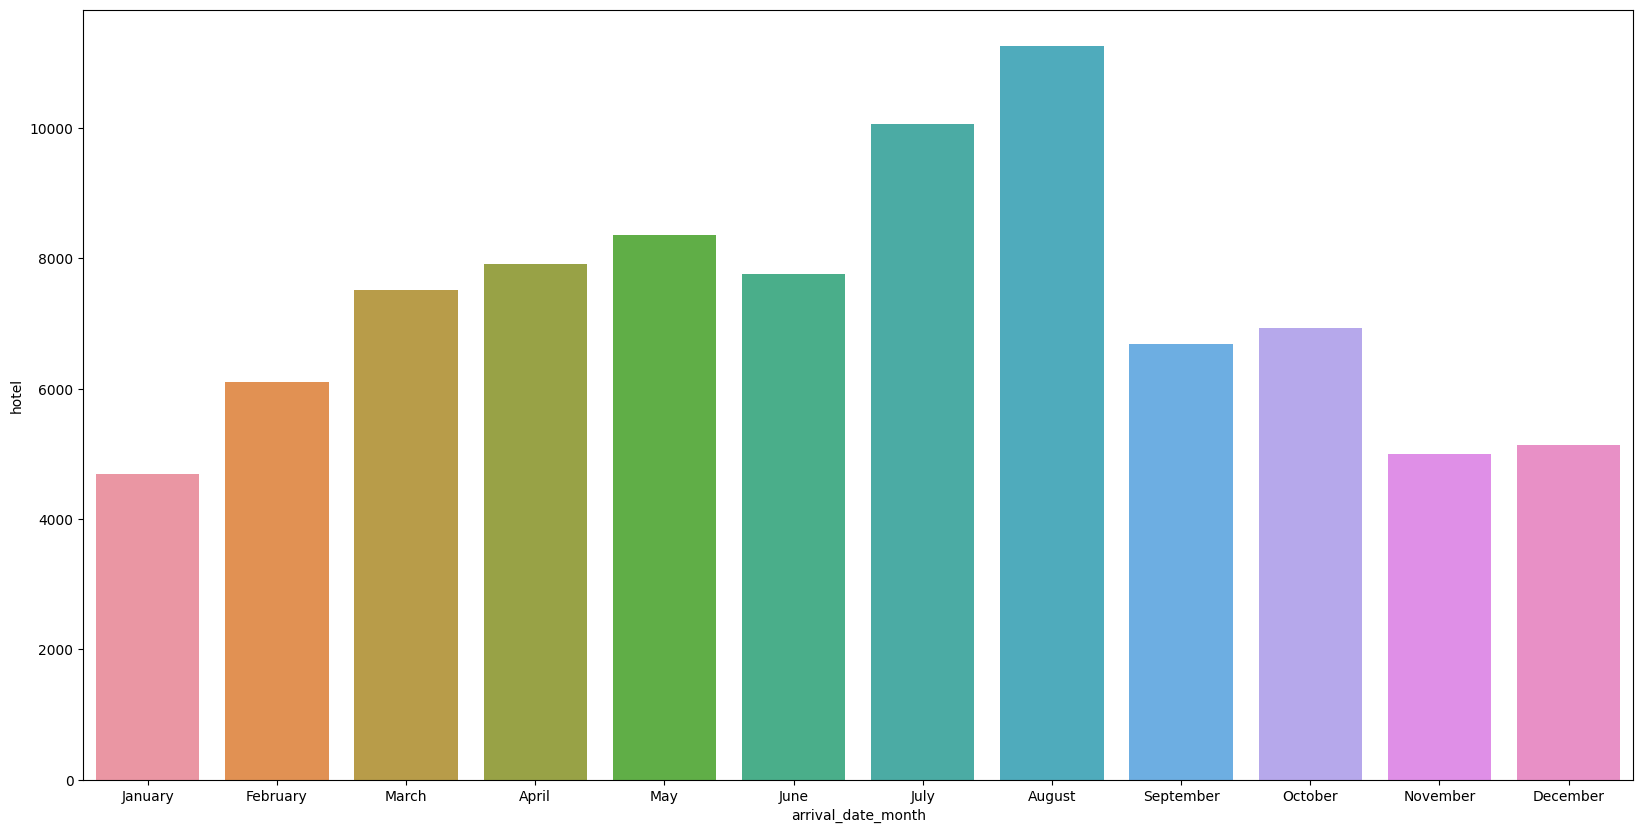

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(ax=ax,x='arrival_date_month',y='hotel',order=month,data=df3)

In [53]:
#Bookings(Arrivals) consistently increased from January and peaked in July and August .On subsequent months it got reduced

<Axes: xlabel='arrival_date_month', ylabel='hotel'>

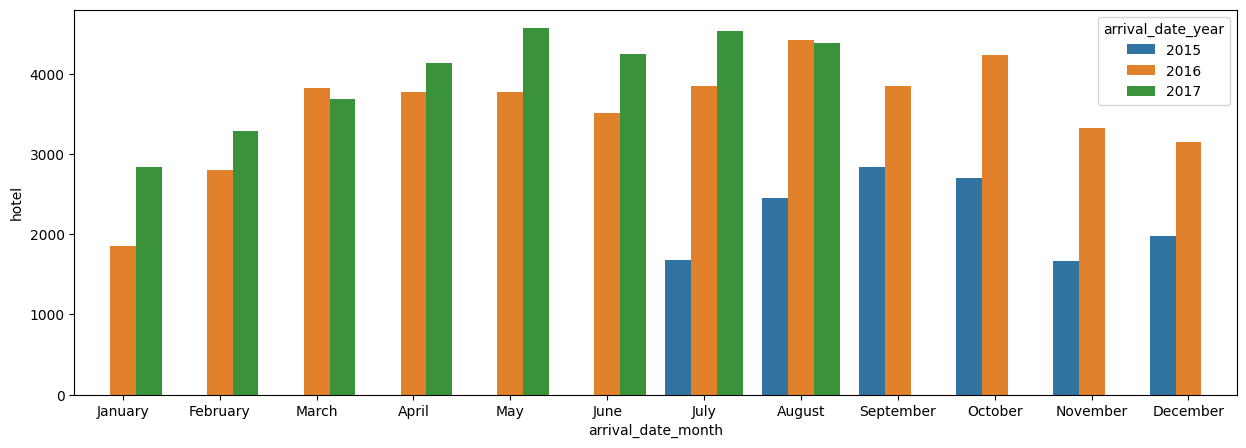

In [206]:
df2=df1.groupby(['arrival_date_year','arrival_date_month'])['hotel'].count().reset_index()
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(x='arrival_date_month',y='hotel',hue='arrival_date_year',order=month,data=df2)


In [ ]:
#Data is vastly differing over the years. But winter has less demand in each years

<Axes: xlabel='arrival_date_month', ylabel='hotel'>

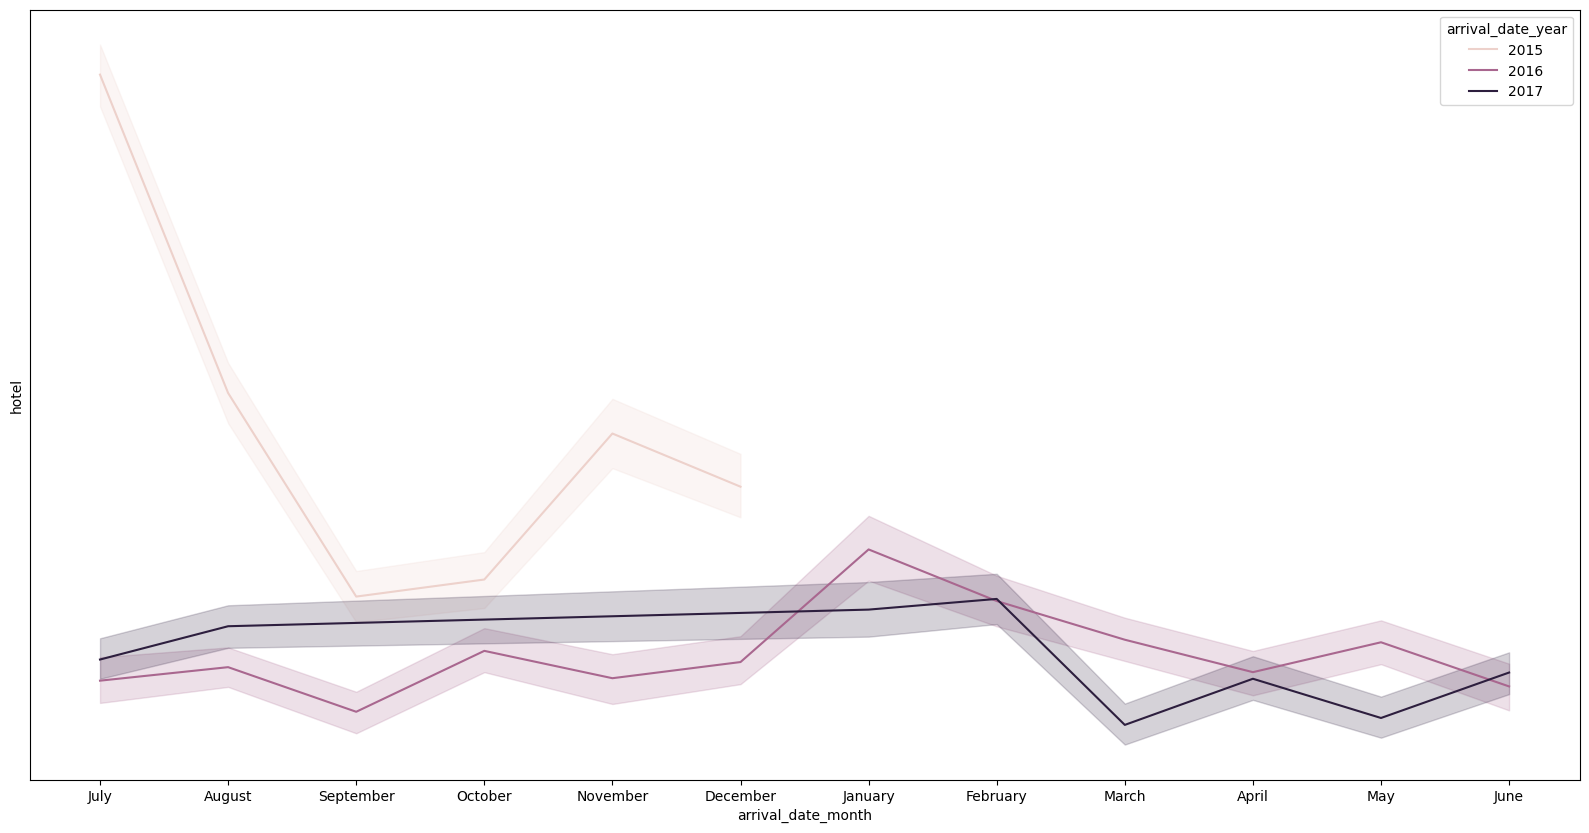

In [54]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='arrival_date_month',y='hotel',hue='arrival_date_year',data=df1)

<Axes: xlabel='arrival_date_month', ylabel='is_canceled'>

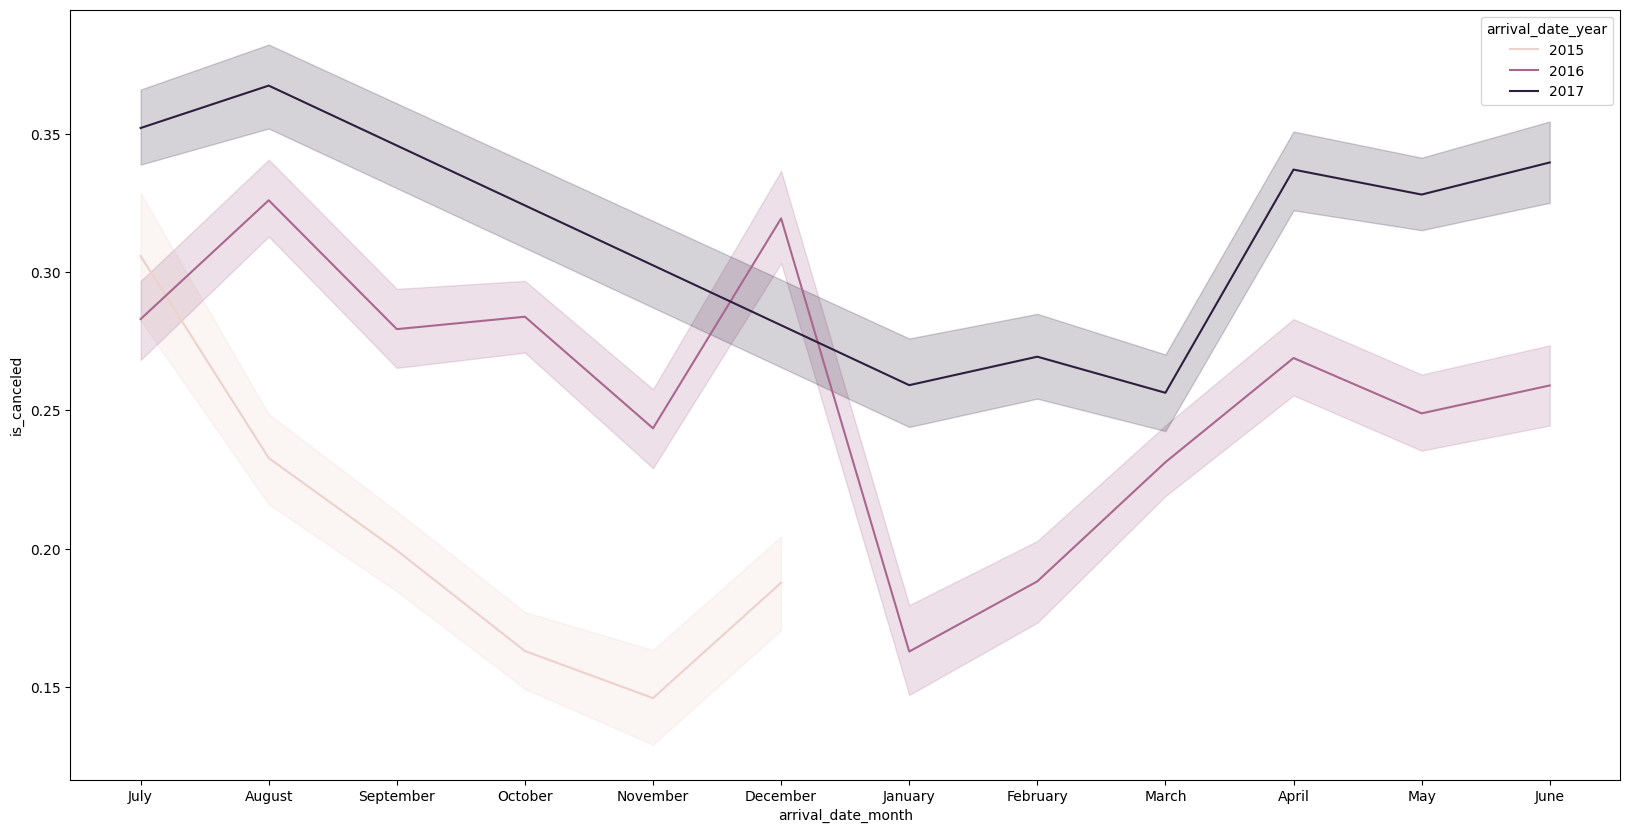

In [55]:
df2=df1[df1['is_canceled']==1]
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='arrival_date_month',y='is_canceled',hue='arrival_date_year',data=df1)

<Axes: xlabel='arrival_date_month', ylabel='stays_in_week_nights'>

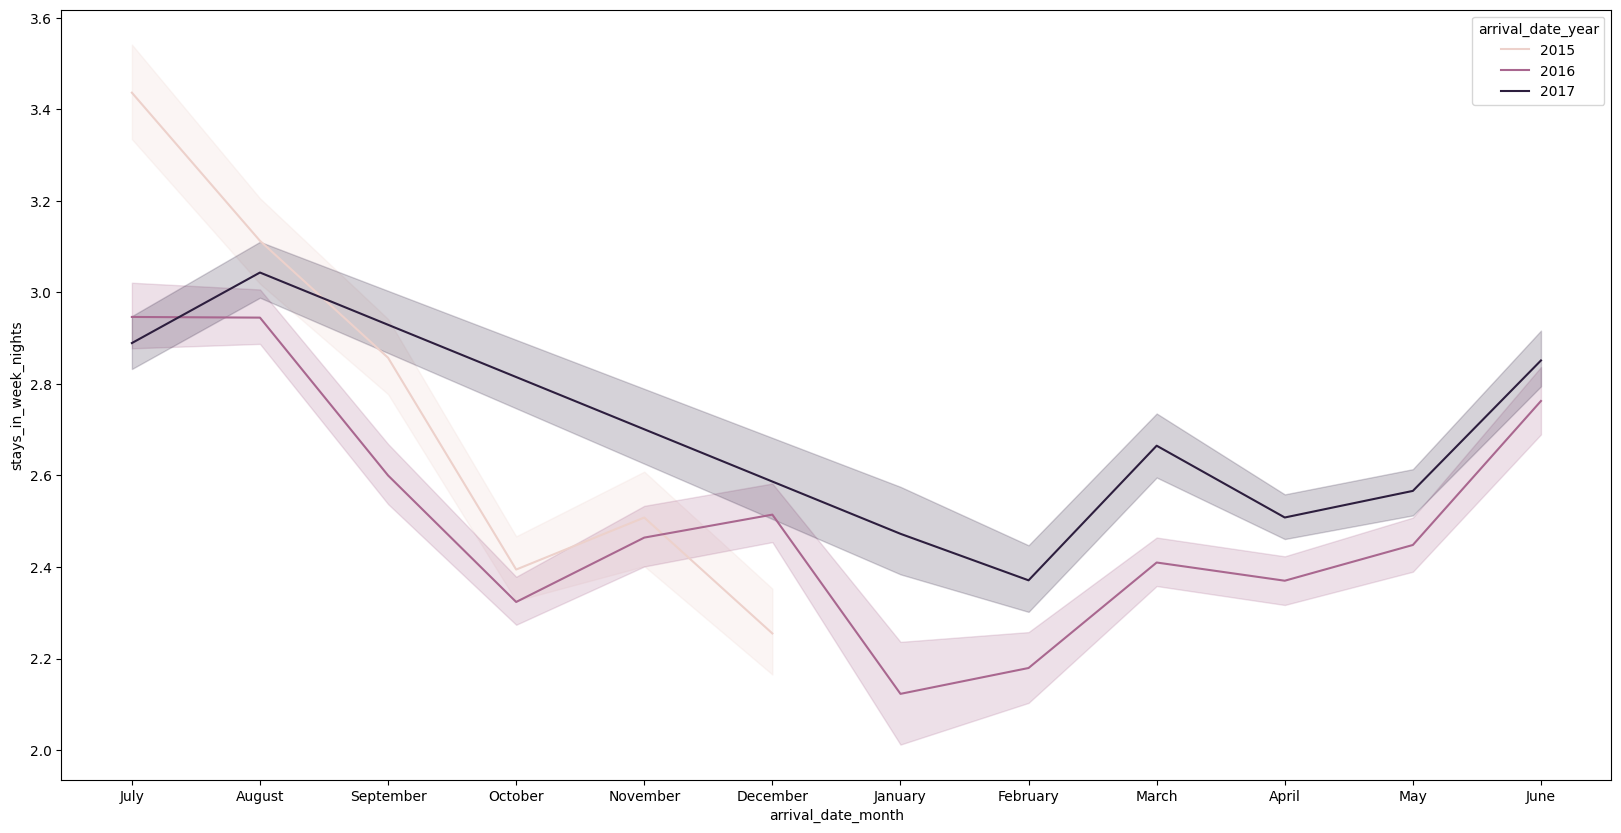

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='arrival_date_month',y='stays_in_week_nights',hue='arrival_date_year',data=df1)

In [57]:
#Week nights staying is more in the summer months for the three years. Summer season has more week nights

<Axes: xlabel='arrival_date_month', ylabel='adr'>

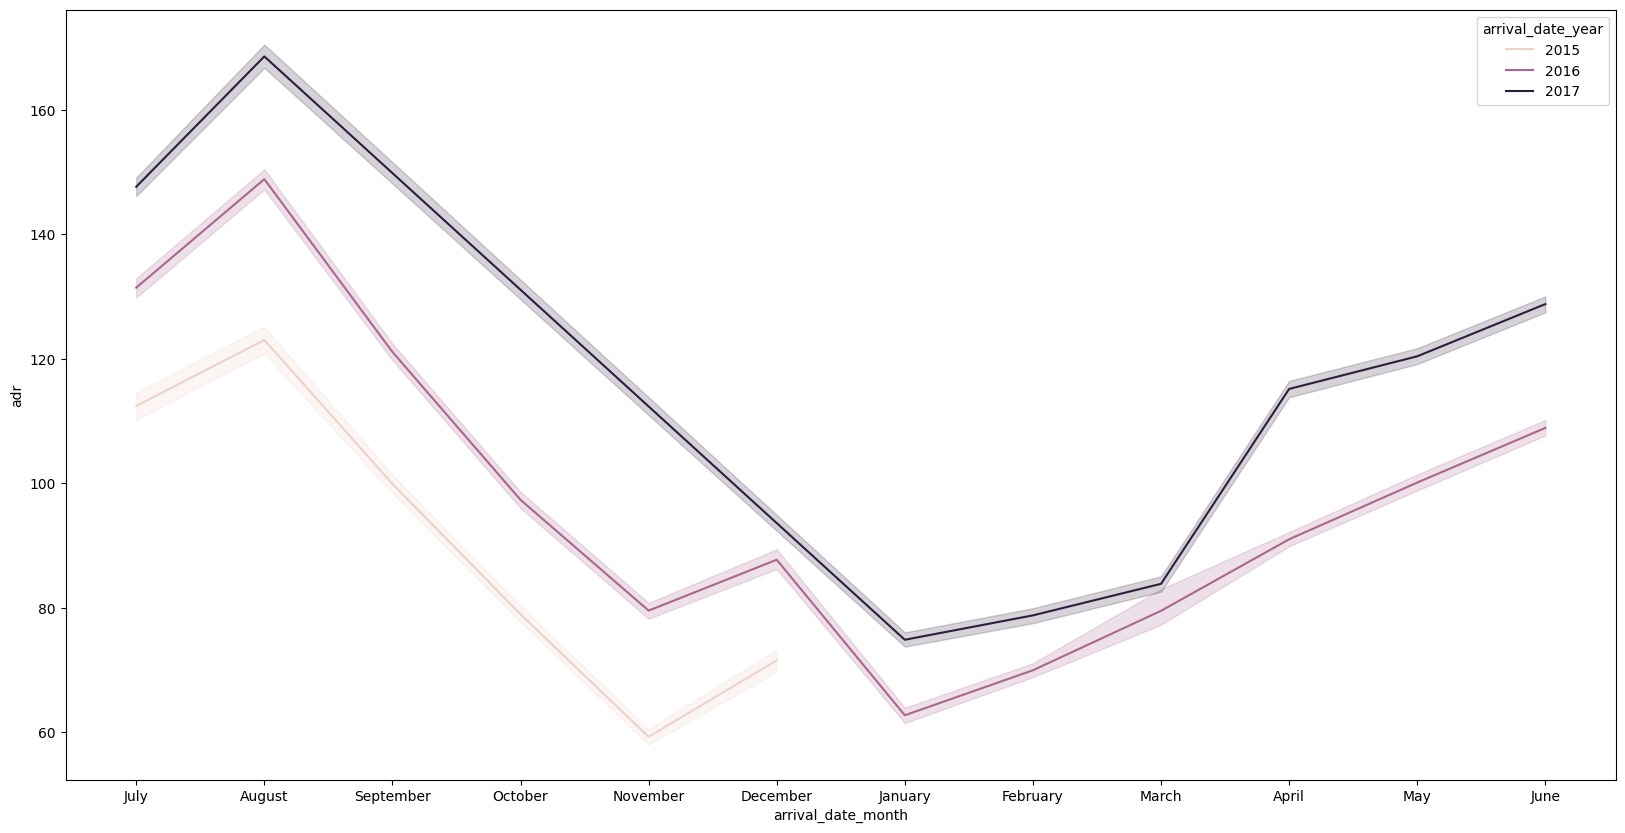

In [59]:
#ADR over the years have increased. More ADR during summer months. It reduces during the winter months corroborating with lesser hotels booked in winters

<Axes: xlabel='arrival_date_month', ylabel='hotel'>

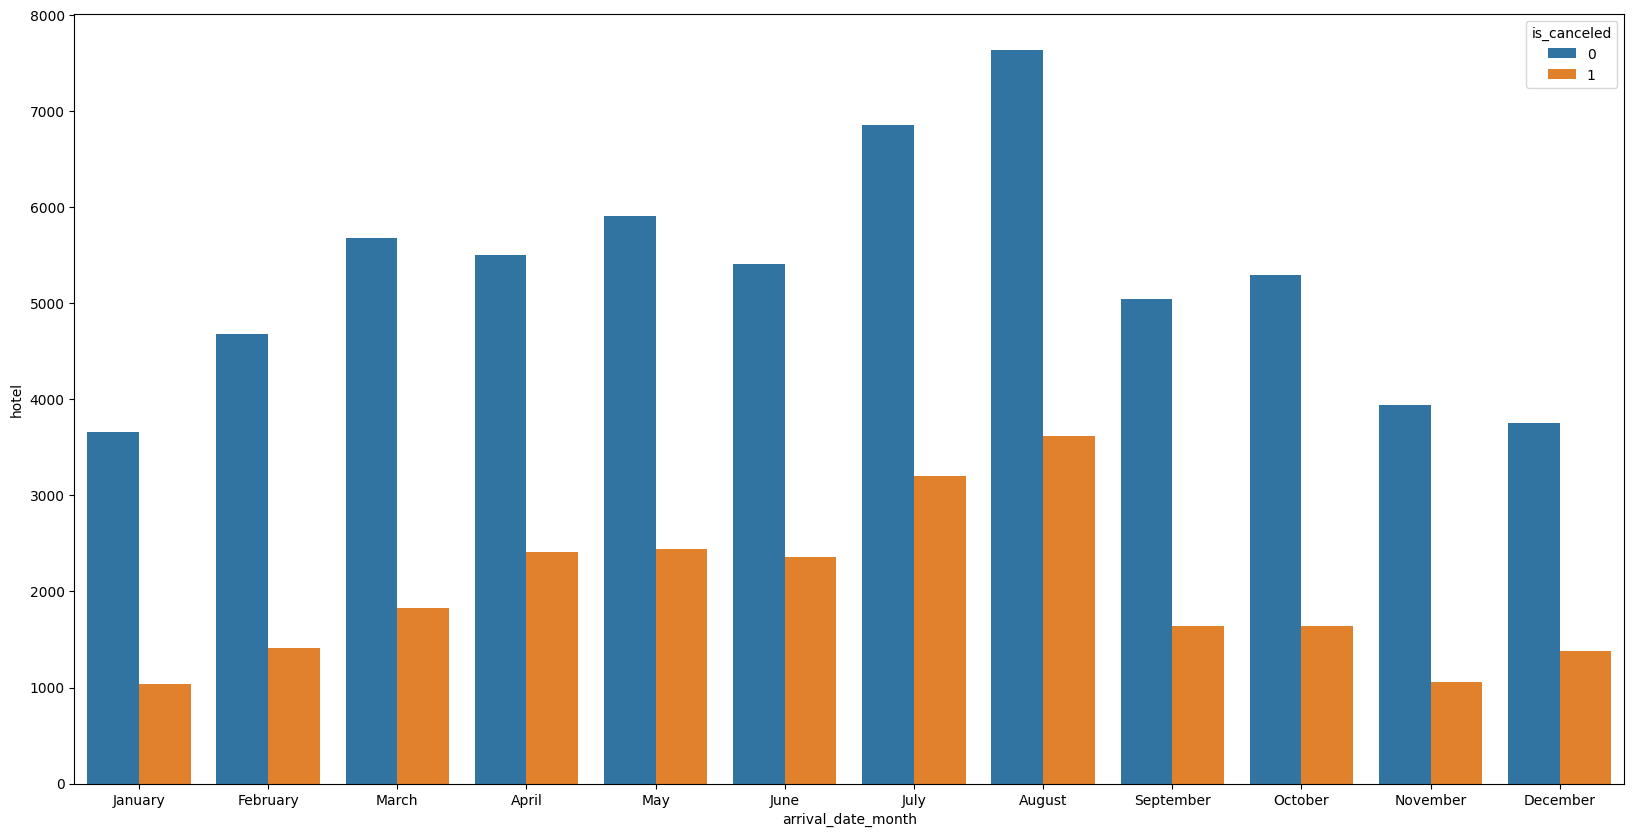

In [60]:
df3=df1.groupby(['arrival_date_month','is_canceled'])['hotel'].count().reset_index()
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='arrival_date_month',y='hotel',hue='is_canceled',order=month,data=df3)

In [61]:
#Taking into consideration cancellations. Even removing cancelled bookings still it is following the same trend as shown in previous chart. July and August though have more bookings it 
#still have more cancellations as well

<Axes: xlabel='arrival_date_week_number', ylabel='hotel'>

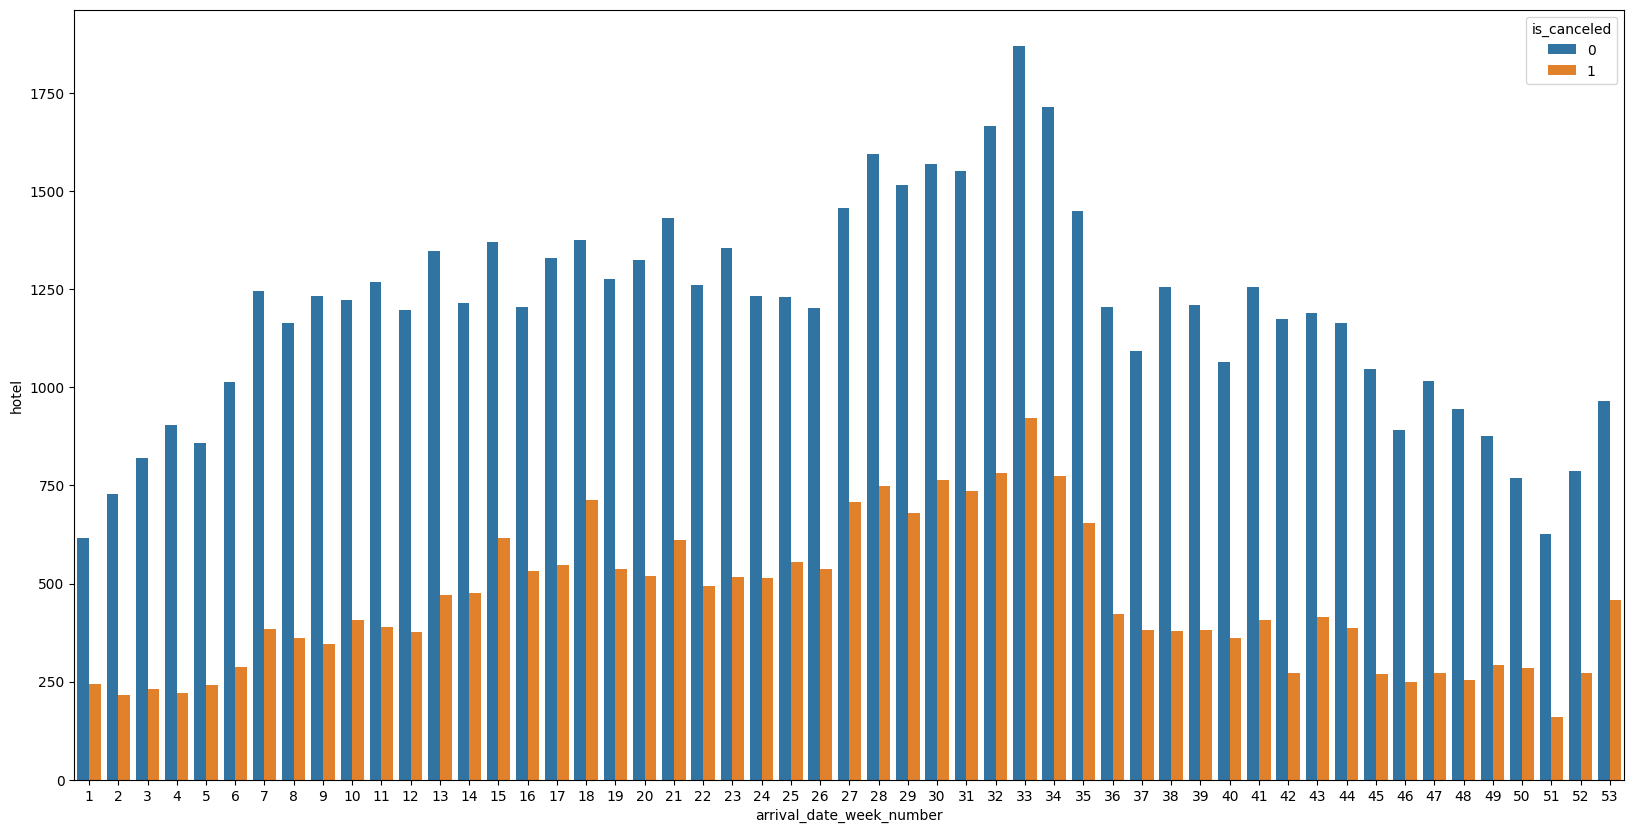

In [62]:
df3=df1.groupby(['arrival_date_week_number','is_canceled'])['hotel'].count().reset_index()
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='arrival_date_week_number',y='hotel',hue='is_canceled',data=df3)

<Axes: xlabel='arrival_date_day_of_month', ylabel='hotel'>

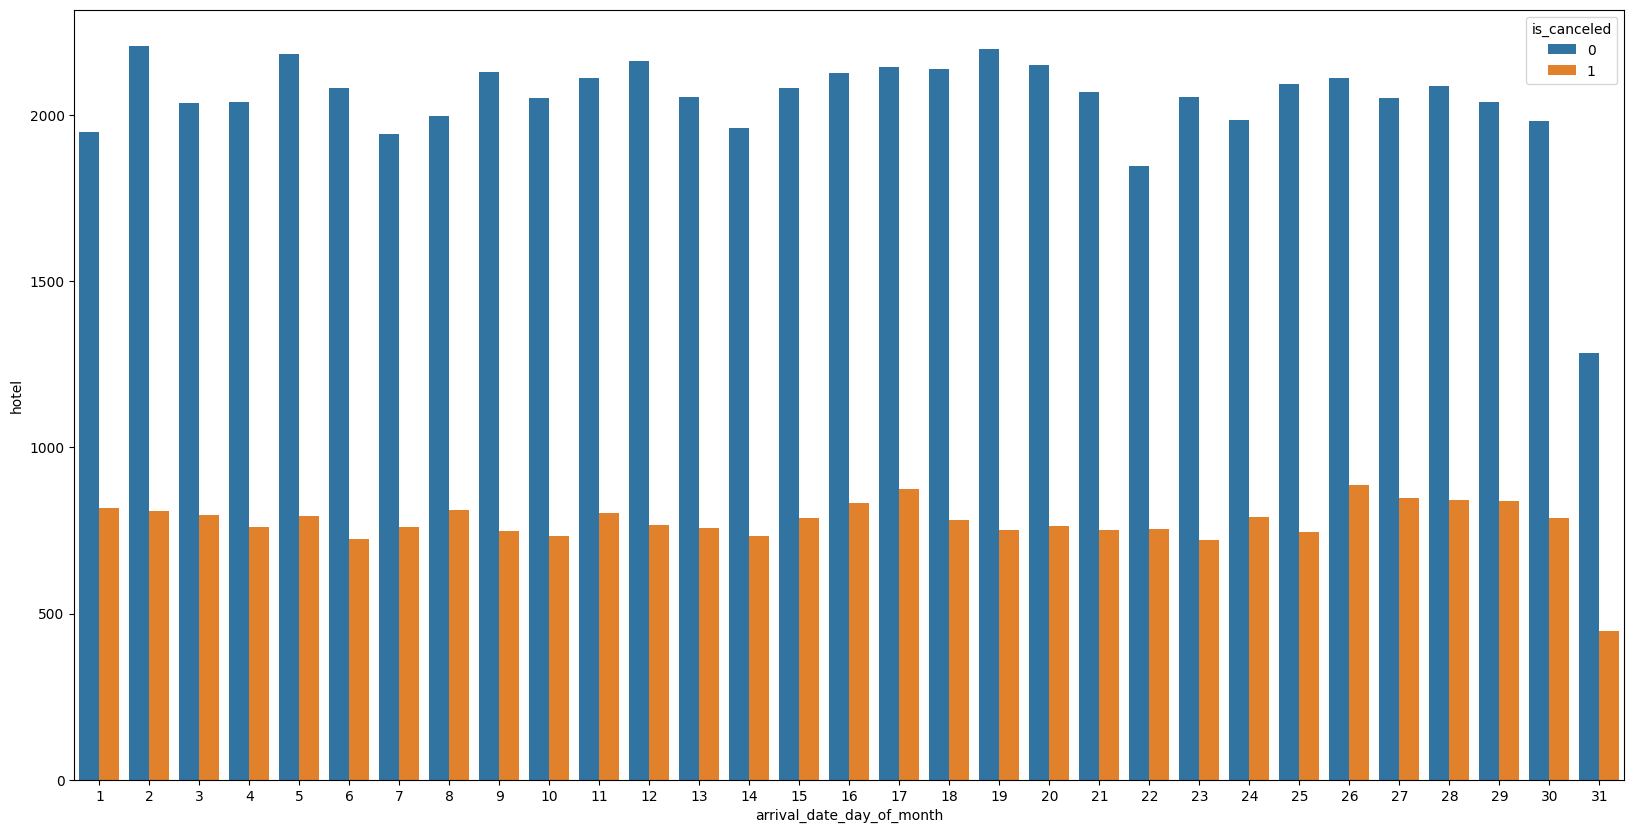

In [63]:
df3=df1.groupby(['arrival_date_day_of_month','is_canceled'])['hotel'].count().reset_index()
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='arrival_date_day_of_month',y='hotel',hue='is_canceled',data=df3)

In [64]:
#There is nothing as such trend of booking more or less on days of month. 31 has less bookings as well cancellations as 31 are on only 6 months

<Axes: xlabel='no_weekend_nights', ylabel='hotel'>

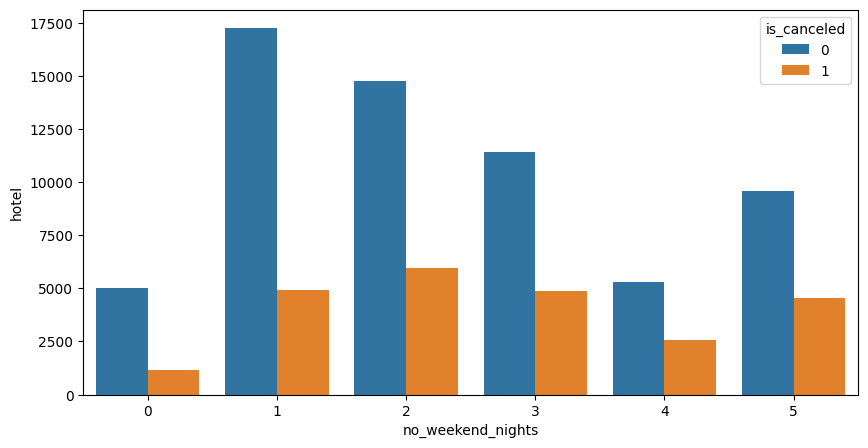

In [209]:
df2=df1.groupby(['is_canceled','no_weekend_nights'])['hotel'].count().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='no_weekend_nights',y='hotel',hue='is_canceled',data=df2)

In [ ]:
#No trend between cancellation and weekend

**Analysing Country**

In [65]:
df2=df1['country'].value_counts()
df2.head(10)

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: country, dtype: int64

In [ ]:
#The Top 10 country from booking perspective. We See Portugal has highest booking from

In [66]:
df4=df1[df1['is_canceled']==0].groupby('country')['hotel'].count().reset_index()

<Axes: xlabel='country', ylabel='hotel'>

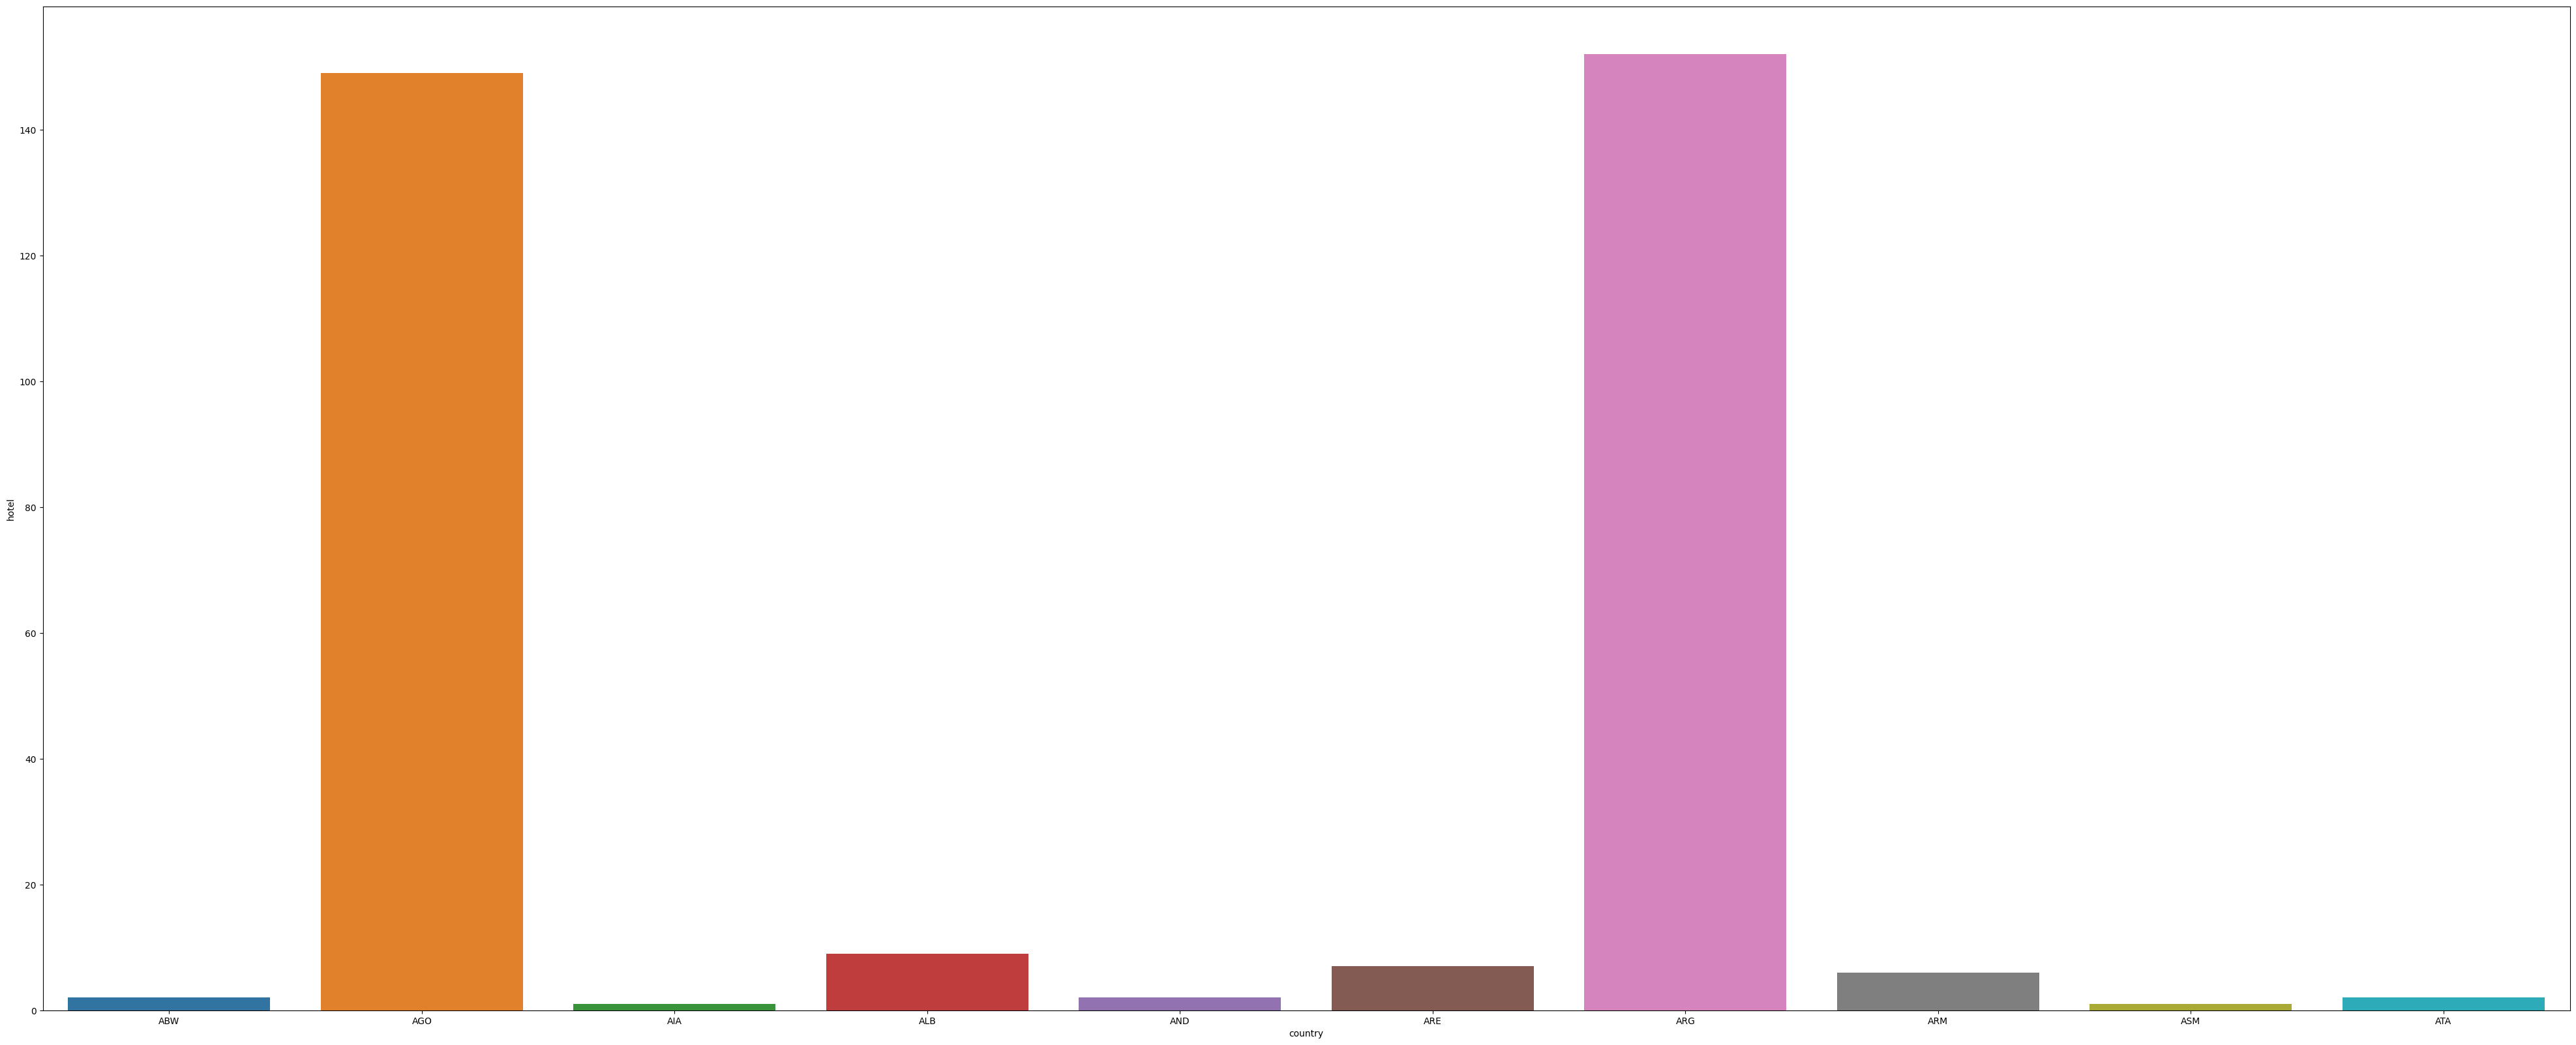

In [67]:
fig, ax = plt.subplots(figsize=(50,20))
sns.barplot(x='country',y='hotel',data=df4.head(10))

**Analysing Market Segment**

In [68]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Text(0, 0.5, 'count')

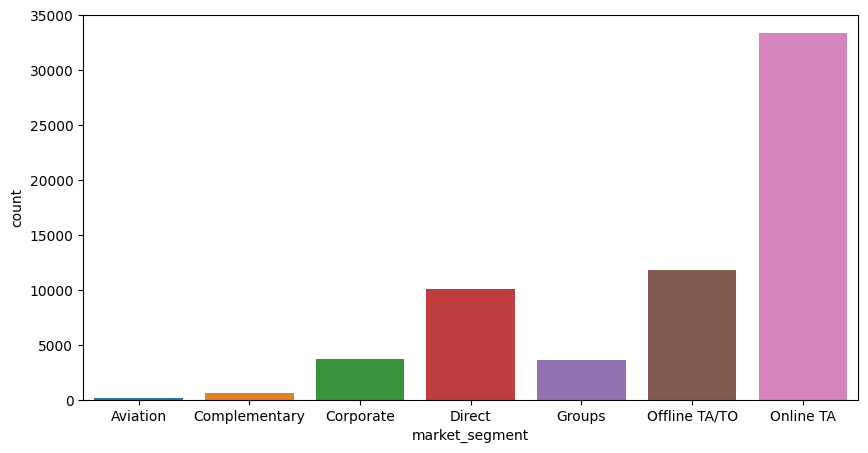

In [69]:
df4=df1[df1['is_canceled']==0].groupby(['market_segment'])['hotel'].count().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='market_segment',y='hotel',data=df4)
ax.set_ylabel('count')

Text(0, 0.5, 'count')

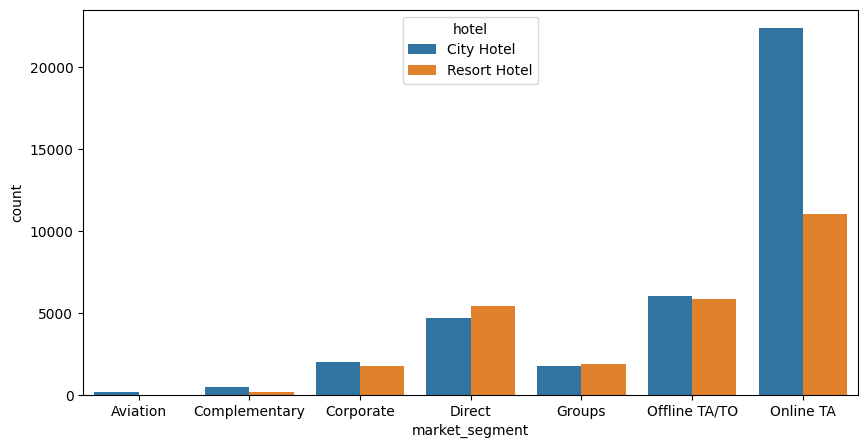

In [70]:
df4=df1[df1['is_canceled']==0].groupby(['market_segment','hotel'])['adults'].count().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='market_segment',y='adults',hue='hotel',data=df4)
ax.set_ylabel('count')

In [ ]:
#Most of the data fall into market segment of Online TA whether City or Resort Hotel

**Analysing Distribution Channel**

In [72]:
df1['distribution_channel'].value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

In [73]:
#Seeing column names distribution channel and market segment seems similar. Further test required

<Axes: xlabel='distribution_channel', ylabel='hotel'>

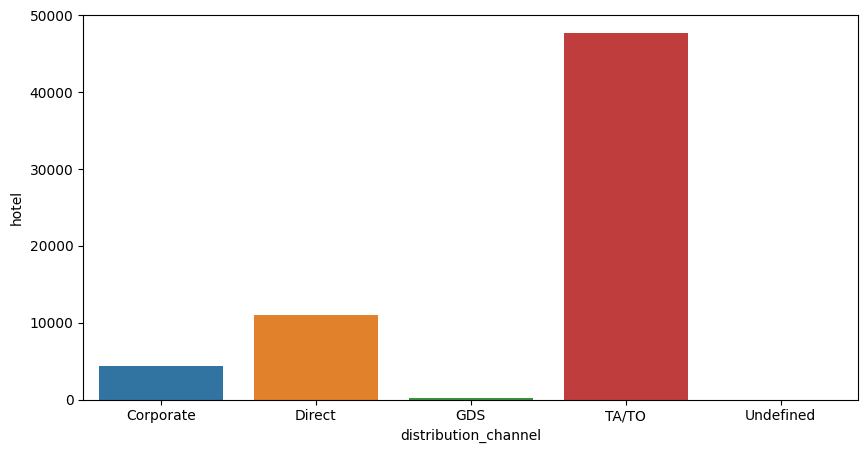

In [74]:
df3=df1[df1['is_canceled']==0].groupby(['distribution_channel'])['hotel'].count().reset_index()
ax, fig=plt.subplots(figsize=(10,5))
sns.barplot(x='distribution_channel',y='hotel',data=df3)

In [75]:
#Again seeing that here TA/TO is the most preferred distribution channel

Text(0, 0.5, 'count')

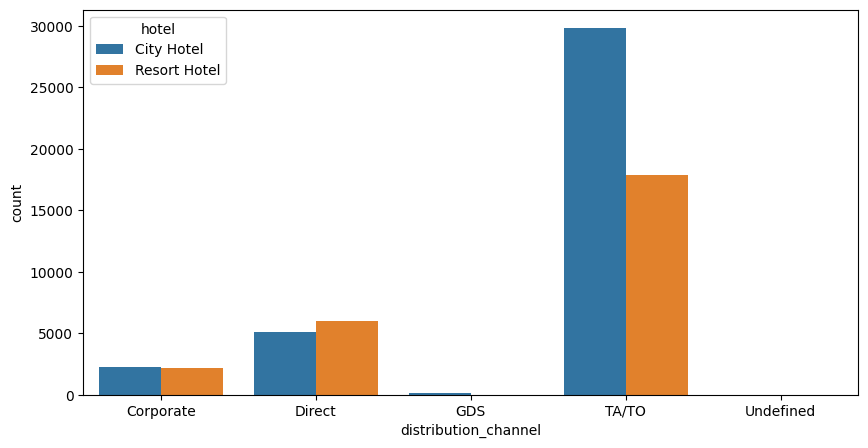

In [76]:
df3=df1[df1['is_canceled']==0].groupby(['distribution_channel','hotel'])['adults'].count().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='distribution_channel',y='adults',hue='hotel',data=df3)
ax.set_ylabel('count')

In [77]:
#Same trend followed by both types of hotels

**Analysing reserved_room_type**

In [78]:
df4=df1['reserved_room_type'].value_counts()

<Axes: xlabel='reserved_room_type', ylabel='count'>

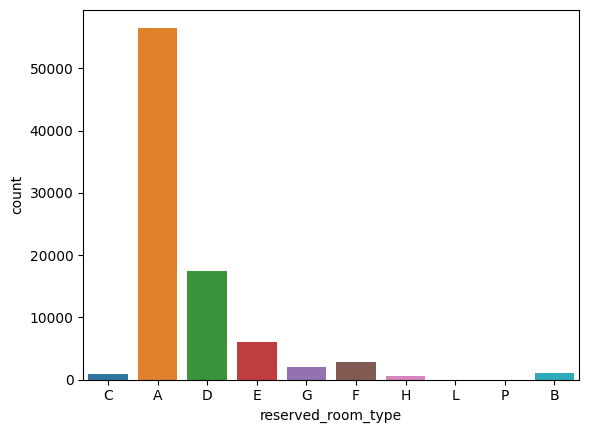

In [79]:
sns.countplot(x='reserved_room_type',data=df1)

In [80]:
#most reserved room is A .Highest on booking demand

In [81]:
df1['assigned_room_type'].value_counts()

A    46313
D    22432
E     7195
F     3627
G     2498
C     2165
B     1820
H      706
I      357
K      276
P        6
L        1
Name: assigned_room_type, dtype: int64

<Axes: xlabel='assigned_room_type', ylabel='count'>

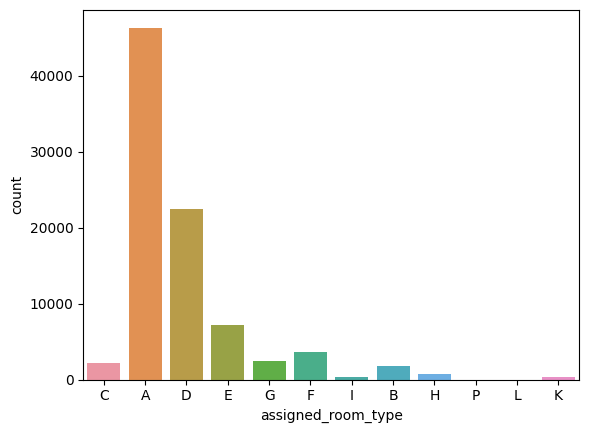

In [82]:
sns.countplot(x='assigned_room_type',data=df1)

<Axes: xlabel='assigned_room_type', ylabel='hotel'>

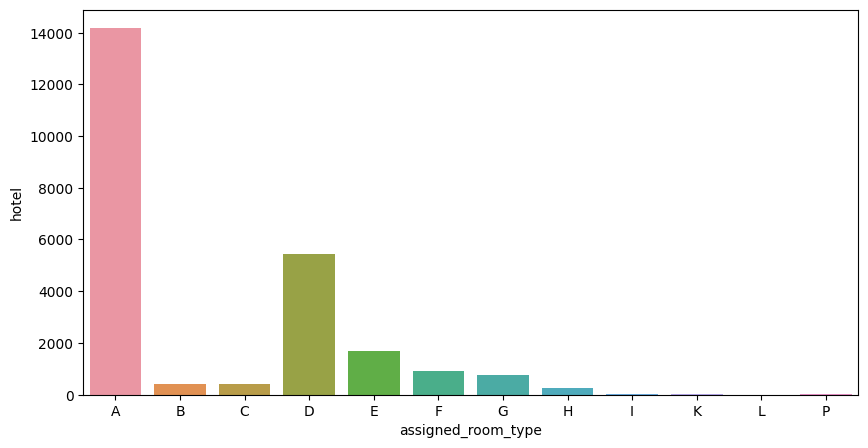

In [83]:
df4=df1[df1['is_canceled']==1].groupby('assigned_room_type')['hotel'].count().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='assigned_room_type',y='hotel',data=df4)

In [84]:
#No such trend for particular type of rooms being cancelled

In [85]:
df1[df1['reserved_room_type']==df1['assigned_room_type']].head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,weekend_night
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,14.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2,0


In [86]:
def f1(reserved_room_type,assigned_room_type):
    if reserved_room_type!=assigned_room_type:
        return 1
    else:
        return 0    

In [87]:
df1['same_room']=df1.apply(lambda x:f1(x['reserved_room_type'],x['assigned_room_type']),axis=1)

<Axes: xlabel='same_room', ylabel='hotel'>

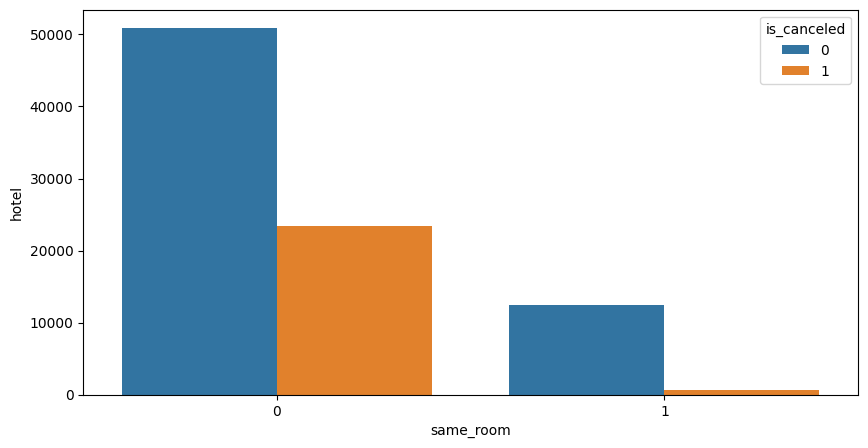

In [88]:
df4=df1.groupby(['is_canceled','same_room'])['hotel'].count().reset_index()
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='same_room',y='hotel',hue='is_canceled',data=df4)

In [89]:
#No relation between cancellation and allotment of different rooms compared to wanted rooms

# **Analysing--repeated_guest,previous_cancellations,previous bookings not cancelled**

In [90]:
df5=df1[['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled']]

<Axes: >

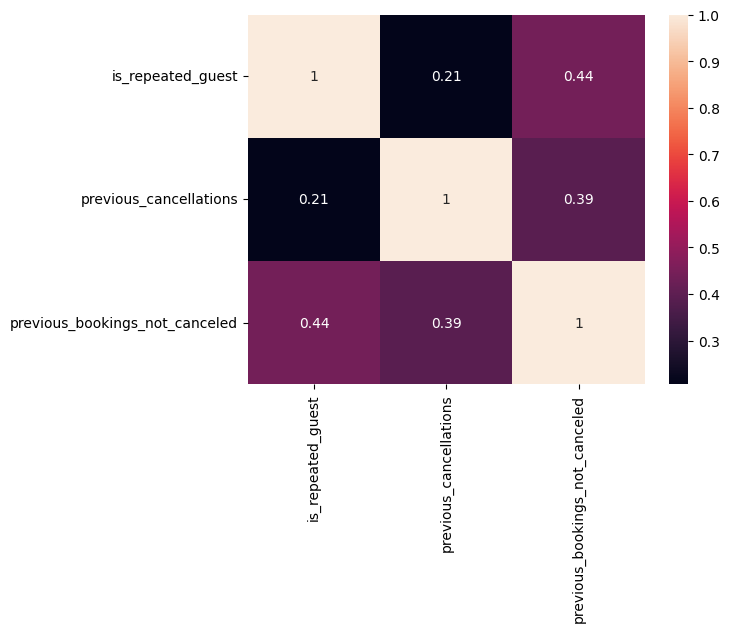

In [91]:
sns.heatmap(df5.corr(),annot=True)

In [92]:
#there is slight indications of link between the 3 variables

**Analysing Repeated guest**

<Axes: xlabel='is_repeated_guest', ylabel='hotel'>

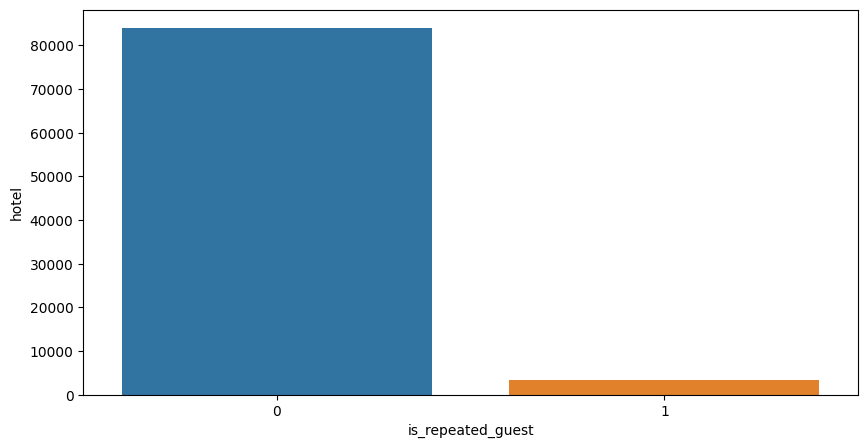

In [93]:
df4=df1.groupby(['is_repeated_guest'])['hotel'].count().reset_index()
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='is_repeated_guest',y='hotel',data=df4)

In [94]:
#Repeated guests are very very less in no

In [95]:
df1.groupby(['is_repeated_guest','is_canceled'])['hotel'].count().reset_index()

,is_repeated_guest,is_canceled,hotel
0,0,0,60217
1,0,1,23764
2,1,0,3154
3,1,1,261


87396


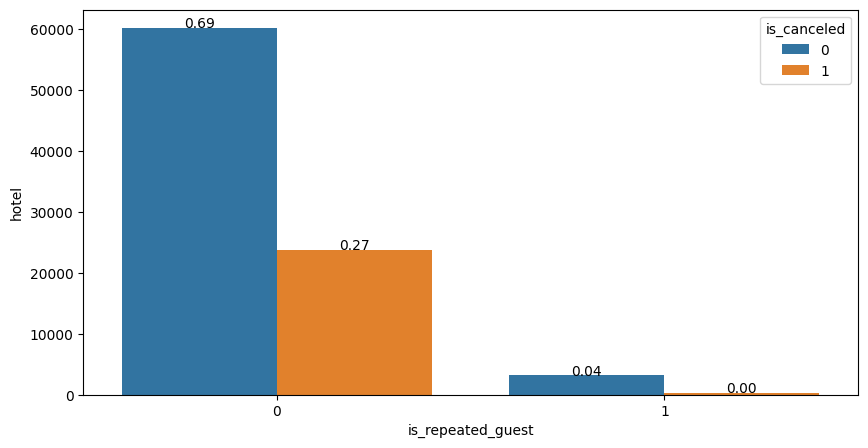

In [96]:
df4=df1.groupby(['is_repeated_guest','is_canceled'])['hotel'].count().reset_index()
total = sum(df4['hotel'])
print(total)
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='is_repeated_guest',y='hotel',hue='is_canceled',data=df4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center")

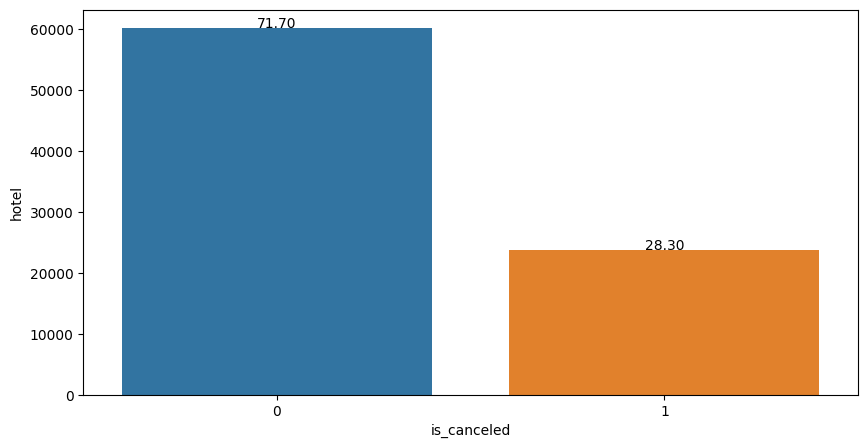

In [97]:
df4=df1[df1['is_repeated_guest']==0].groupby(['is_canceled'])['hotel'].count().reset_index()
total = sum(df4['hotel'])
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='is_canceled',y='hotel',data=df4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height*100/total), ha="center")

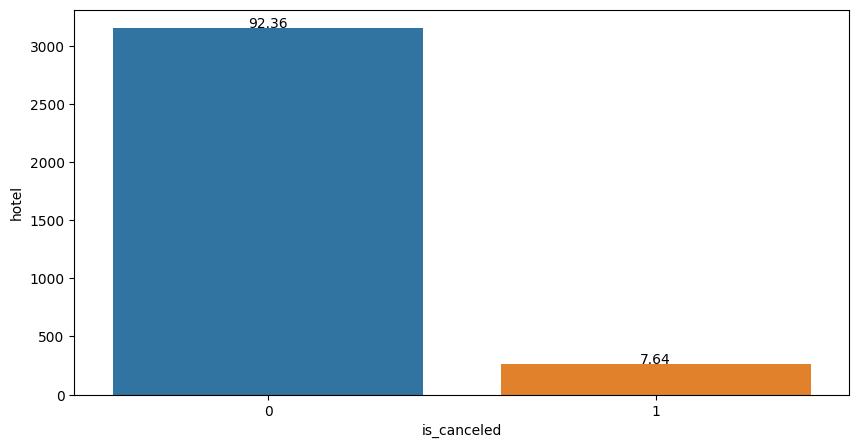

In [98]:
df4=df1[df1['is_repeated_guest']==1].groupby(['is_canceled'])['hotel'].count().reset_index()
total = sum(df4['hotel'])
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='is_canceled',y='hotel',data=df4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height*100/total), ha="center")

In [99]:
#Repeated guests tend  to cancel hotel booking lesser compared to non repeated guests

**Analysing previous cancellations**

In [100]:
df1['previous_cancellations'].value_counts()

0     85711
1      1407
2       112
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
14        1
19        1
21        1
Name: previous_cancellations, dtype: int64

**Analysing previous bookings not cancelled**

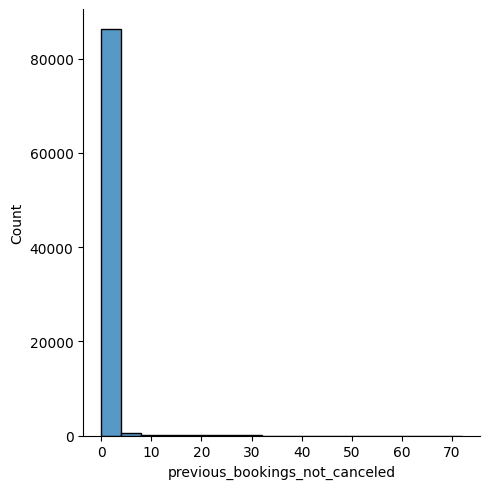

In [101]:
sns.displot(df1['previous_bookings_not_canceled'])

In [102]:
#Changing this feature into categorical variable 0--room not canceled. 1--room canceled

In [103]:
df1['previous_bookings_not_canceled_1']=df1['previous_bookings_not_canceled'].apply(lambda x:  1 if x>0 else 0)

In [104]:
df1['previous_bookings_not_canceled_1'].value_counts()

0    83851
1     3545
Name: previous_bookings_not_canceled_1, dtype: int64

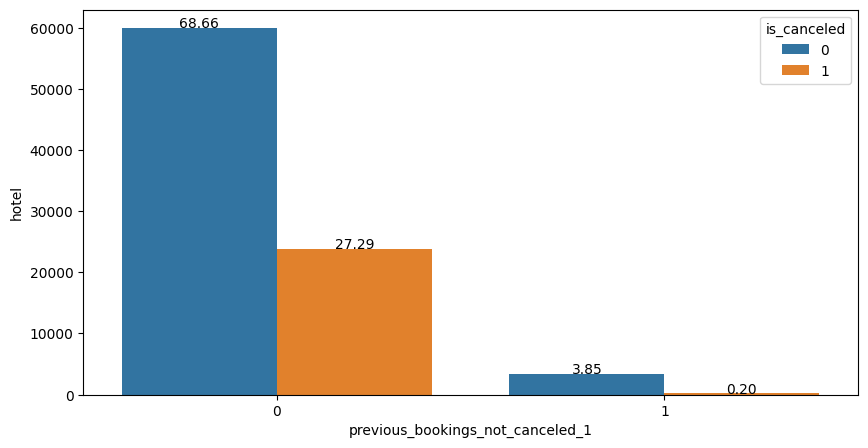

In [106]:
df4=df1.groupby(['previous_bookings_not_canceled_1','is_canceled'])['hotel'].count().reset_index()
total = sum(df4['hotel'])
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='previous_bookings_not_canceled_1',y='hotel',hue='is_canceled',data=df4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height*100/total), ha="center")

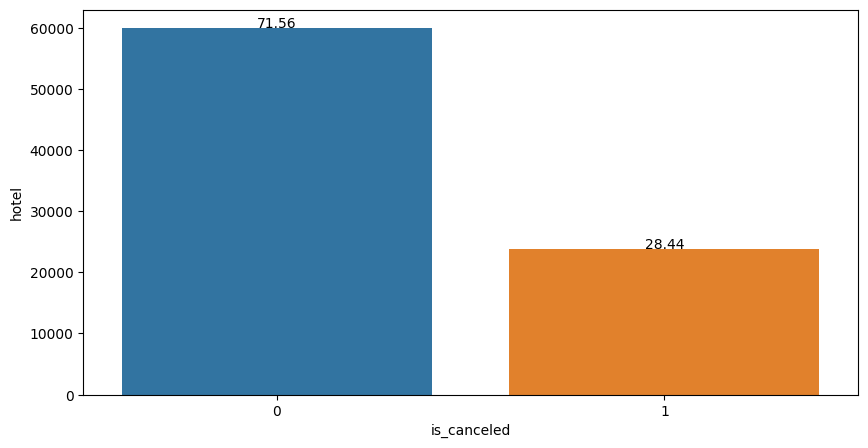

In [107]:
df4=df1[df1['previous_bookings_not_canceled_1']==0].groupby(['is_canceled'])['hotel'].count().reset_index()
total = sum(df4['hotel'])
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='is_canceled',y='hotel',data=df4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height*100/total), ha="center")

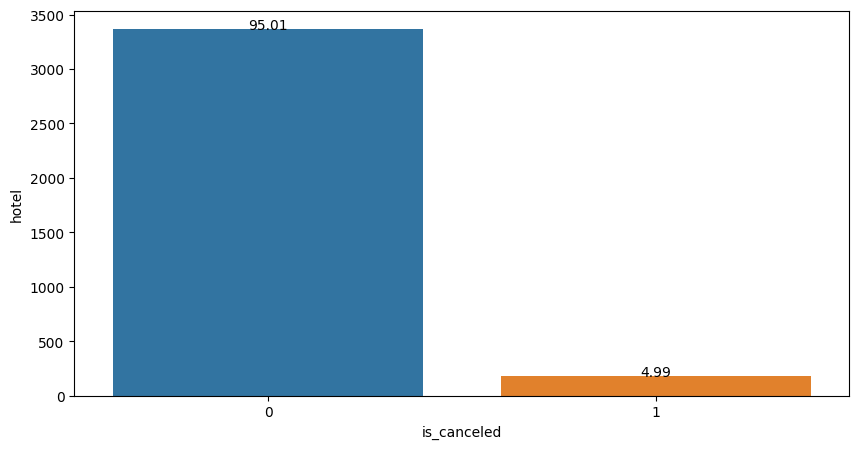

In [108]:
df4=df1[df1['previous_bookings_not_canceled_1']==1].groupby(['is_canceled'])['hotel'].count().reset_index()
total = sum(df4['hotel'])
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='is_canceled',y='hotel',data=df4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height*100/total), ha="center")

In [109]:
#No relation between previous bookings canceled and current hotel booking canceling

In [110]:
df1['booking_changes'].value_counts()

0     71494
1     10902
2      3508
3       875
4       356
5       116
6        59
7        31
8        17
9         8
10        6
13        5
14        5
15        3
16        2
17        2
12        2
11        2
20        1
21        1
18        1
Name: booking_changes, dtype: int64

<Axes: xlabel='booking_changes', ylabel='Count'>

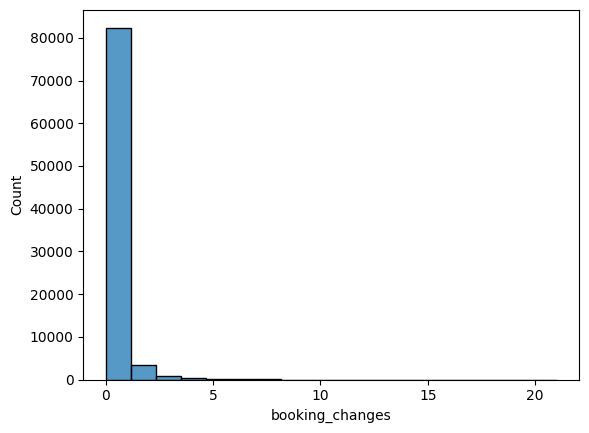

In [111]:
sns.histplot(df1['booking_changes'])

In [112]:
#From this we can see most bookings have 0 changes. Converting it into a categorical variable

In [113]:
df1['booking_changes_1']=df1['booking_changes'].apply(lambda x: 1 if x>0 else 0 )

In [114]:
df1['booking_changes_1'].value_counts()

0    71494
1    15902
Name: booking_changes_1, dtype: int64

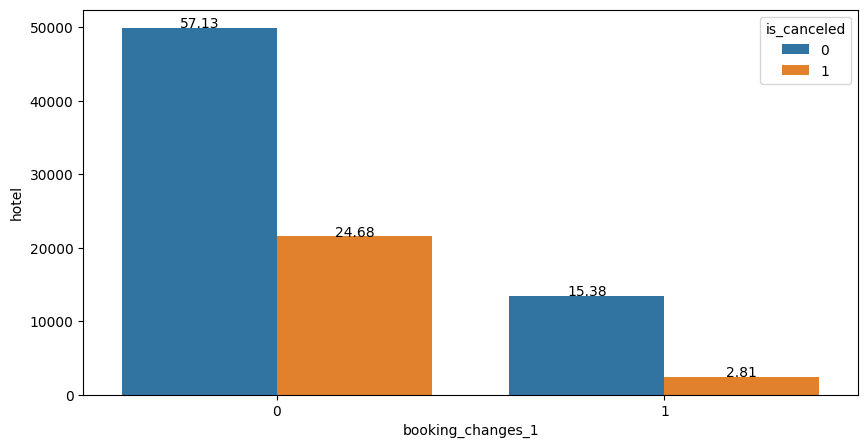

In [115]:
df4=df1.groupby(['booking_changes_1','is_canceled'])['hotel'].count().reset_index()
total = sum(df4['hotel'])
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='booking_changes_1',y='hotel',hue='is_canceled',data=df4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height*100/total), ha="center")

In [116]:
#There is no relation between booking changes and cancelling hotel

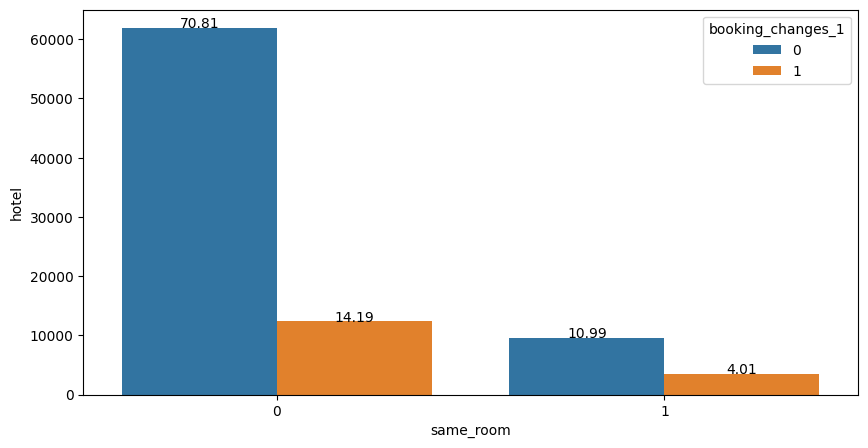

In [117]:
df4=df1.groupby(['booking_changes_1','same_room'])['hotel'].count().reset_index()
total = sum(df4['hotel'])
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='same_room',y='hotel',hue='booking_changes_1',data=df4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height*100/total), ha="center")

**Analysing deposit_type**

In [119]:
df1['deposit_type'].value_counts()

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

<Axes: xlabel='deposit_type', ylabel='Count'>

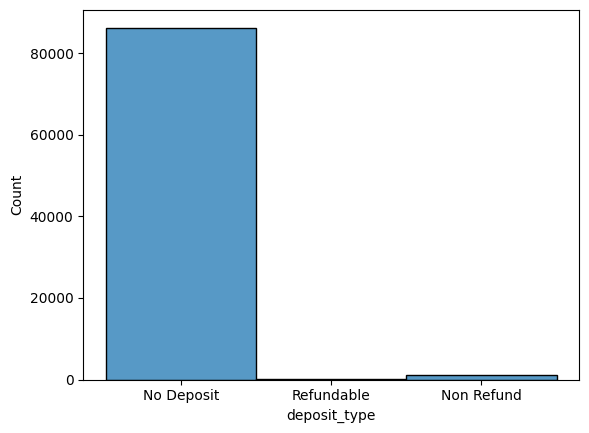

In [120]:
sns.histplot(df1['deposit_type'])

<Axes: xlabel='deposit_type', ylabel='hotel'>

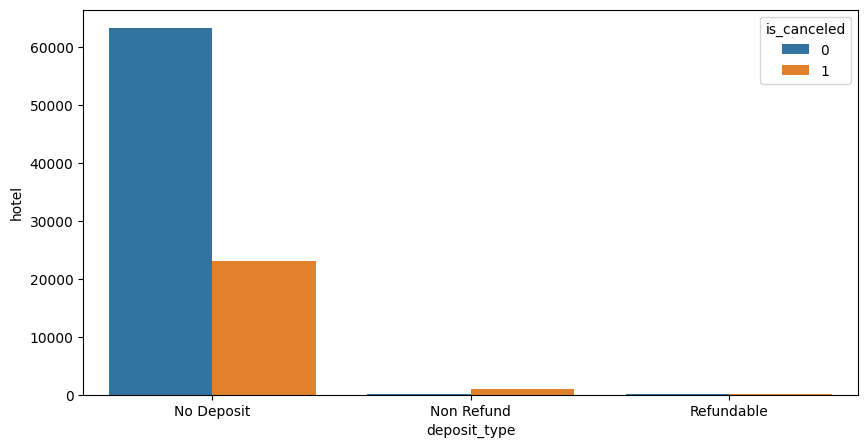

In [121]:
df4=df1.groupby(['deposit_type','is_canceled'])['hotel'].count().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='deposit_type',y='hotel',hue='is_canceled',data=df4)

In [ ]:
#Most of the deposit type are no deposit(no advance payment)


In [122]:
df1['customer_type'].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

<Axes: xlabel='customer_type', ylabel='hotel'>

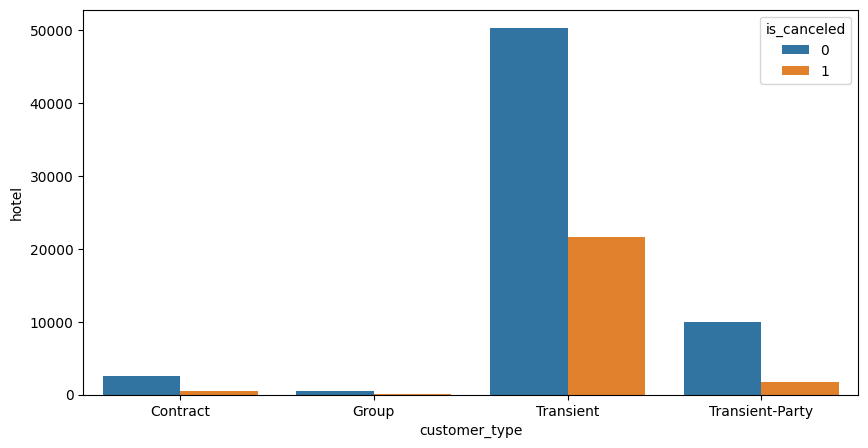

In [123]:
df4=df1.groupby(['customer_type','is_canceled'])['hotel'].count().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='customer_type',y='hotel',hue='is_canceled',data=df4)

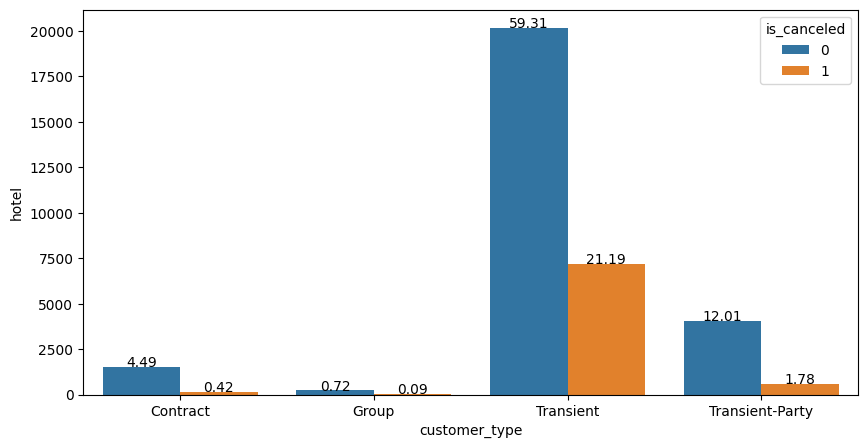

In [124]:
df4=df1[df1['hotel']=='Resort Hotel'].groupby(['customer_type','is_canceled'])['hotel'].count().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
total = sum(df4['hotel'])
sns.barplot(x='customer_type',y='hotel',hue='is_canceled',data=df4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height*100/total), ha="center")

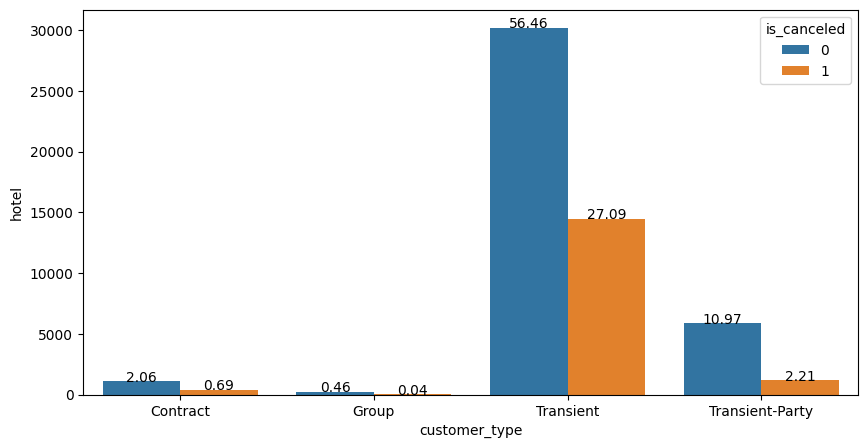

In [125]:
df4=df1[df1['hotel']!='Resort Hotel'].groupby(['customer_type','is_canceled'])['hotel'].count().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
total = sum(df4['hotel'])
sns.barplot(x='customer_type',y='hotel',hue='is_canceled',data=df4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height*100/total), ha="center")

In [ ]:
#In City hotel there is slight higher trend of cancellation among Transient Customers


<Axes: xlabel='agent', ylabel='Count'>

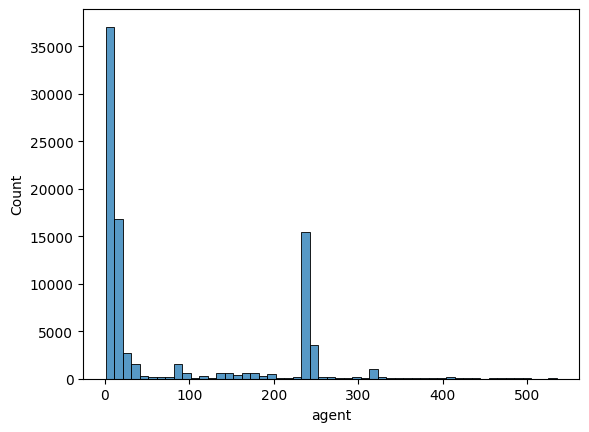

In [126]:
sns.histplot(df1['agent'])

In [127]:
df1['agent'].value_counts().sort_values(ascending=False)

9.0      28759
14.0     15542
240.0    13028
7.0       3300
250.0     2779
241.0     1644
28.0      1502
8.0       1383
1.0       1232
6.0       1117
40.0       986
314.0      844
242.0      722
83.0       614
85.0       524
243.0      477
171.0      402
27.0       395
3.0        363
22.0       345
11.0       318
15.0       303
196.0      281
177.0      277
96.0       272
138.0      257
37.0       225
16.0       220
229.0      218
5.0        216
10.0       214
21.0       199
42.0       194
115.0      192
156.0      187
26.0       187
175.0      182
195.0      181
86.0       180
273.0      179
251.0      175
134.0      168
143.0      163
298.0      160
152.0      156
168.0      153
19.0       151
315.0      151
12.0       133
2.0        129
147.0      128
95.0       125
410.0      121
20.0       117
146.0      112
142.0      111
30.0       106
94.0       103
330.0       99
89.0        90
29.0        84
191.0       82
52.0        82
69.0        81
159.0       80
36.0        77
13.0      

In [ ]:
#Agent 9 has highest bookings. 2-3 agents have more than 10000 bookings. Rest are in range of 1000 and less

In [212]:
df2=df1[df1['agent']==9]
df2.groupby('hotel')['lead_time'].count().reset_index()

,hotel,lead_time
0,City Hotel,28753
1,Resort Hotel,6


In [ ]:
# We see Agent 9 is specialized more into City Booking. 99% of booking through 9 are City type

In [128]:
df2=df1[df1['agent']==240]

In [129]:
df2[df2['hotel']=='City Hotel']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,weekend_night,same_room,previous_bookings_not_canceled_1,booking_changes_1
57131,City Hotel,1,159,2016,September,39,19,1,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,240.0,0,Transient-Party,122.0,0,0,Canceled,2016-09-13,3,1,0,0,1
97715,City Hotel,0,159,2016,September,39,19,1,2,2,0.0,0,BB,PYF,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,240.0,0,Transient-Party,144.0,0,0,Check-Out,2016-09-22,3,1,0,0,1
97887,City Hotel,0,159,2016,September,39,19,1,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,240.0,0,Transient-Party,122.0,0,0,Check-Out,2016-09-22,3,1,0,0,1
97895,City Hotel,0,159,2016,September,39,19,1,2,2,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient-Party,144.0,0,0,Check-Out,2016-09-22,3,1,0,0,0
97899,City Hotel,0,80,2016,September,39,19,1,2,2,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient-Party,144.0,0,0,Check-Out,2016-09-22,3,1,0,0,0
97913,City Hotel,0,159,2016,September,39,19,1,2,2,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient-Party,144.0,0,1,Check-Out,2016-09-22,3,1,0,0,0
97917,City Hotel,0,159,2016,September,39,19,1,2,2,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,A,3,No Deposit,240.0,0,Transient-Party,144.0,0,0,Check-Out,2016-09-22,3,1,0,0,1
97919,City Hotel,0,159,2016,September,39,19,1,2,2,0.0,0,BB,ZAF,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient-Party,144.0,0,0,Check-Out,2016-09-22,3,1,0,0,0


In [130]:
# We see 240 is specialized more into Resort Booking. 95% of booking through 240 are Resort type

In [131]:
df2=df1[df1['agent']==9]

In [132]:
len(df2[df2['hotel']=='City Hotel'])

28753

In [133]:
len(df2[df2['hotel']!='City Hotel'])

6

**Analysing Meal**

In [134]:
df2=df1['meal'].value_counts()

<Axes: xlabel='meal', ylabel='count'>

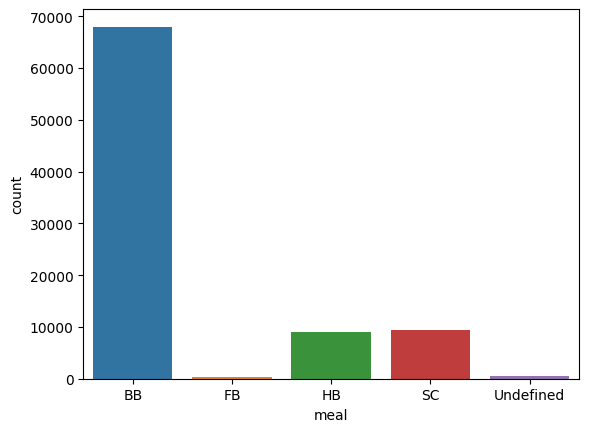

In [135]:
sns.countplot(x='meal',data=df1)

In [136]:
#majority of users prefer BB meal

Text(0, 0.5, 'count')

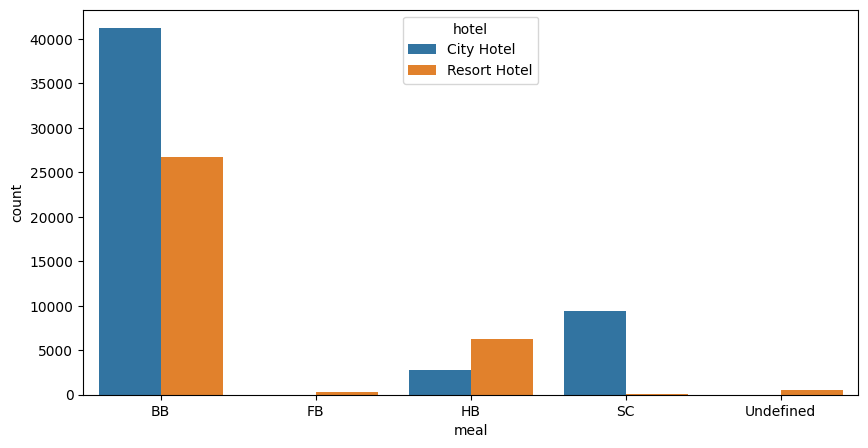

In [137]:
df2=df1.groupby(['meal','hotel'])['lead_time'].count().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='meal',y='lead_time',hue='hotel',data=df2)
ax.set_ylabel('count')

In [138]:
#HB -though very less but still more preferred in Resort Hotel

<Axes: xlabel='meal', ylabel='adr'>

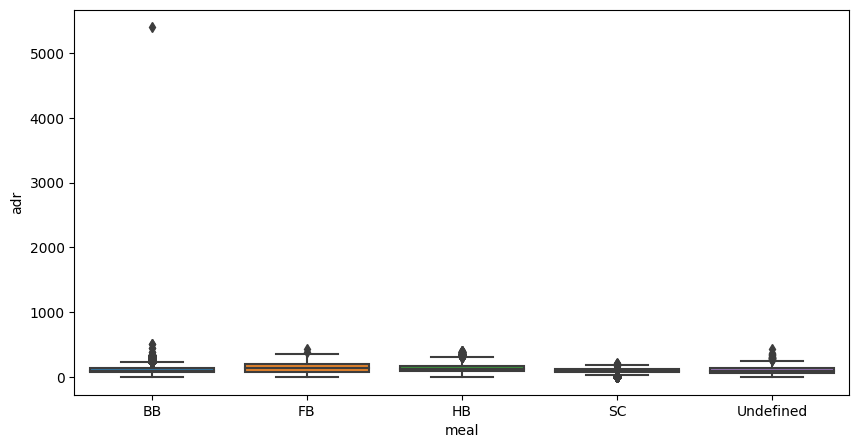

In [139]:
df2=df1.groupby(['meal'])['adr'].median().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x='meal',y='adr',data=df1)


In [140]:
#BB meal slightly has less ADR and that's why may be has highest consumption

**Analysing ADR**

In [141]:
len(df1['adr'].unique())

8879

In [142]:
df1.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,weekend_night,same_room,previous_bookings_not_canceled_1,booking_changes_1
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0,0,1


<Axes: xlabel='hotel', ylabel='adr'>

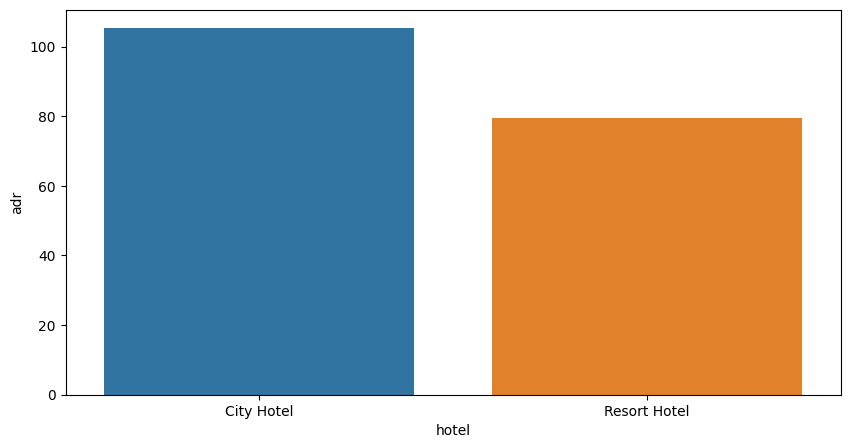

In [143]:
df2=df1.groupby(['hotel'])['adr'].median().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='hotel',y='adr',data=df2)

<Axes: xlabel='hotel', ylabel='adr'>

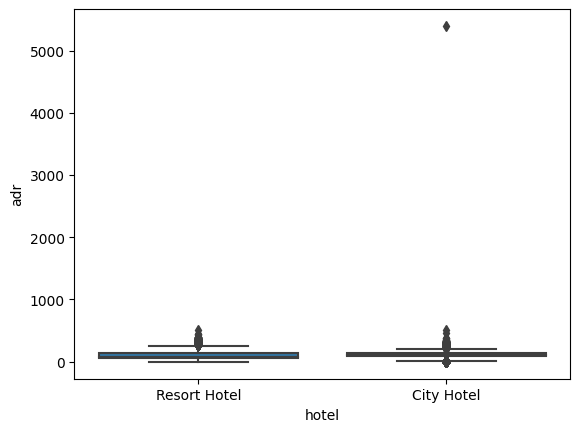

In [144]:
sns.boxplot(x='hotel',y='adr',data=df1)

<Axes: xlabel='hotel', ylabel='adr'>

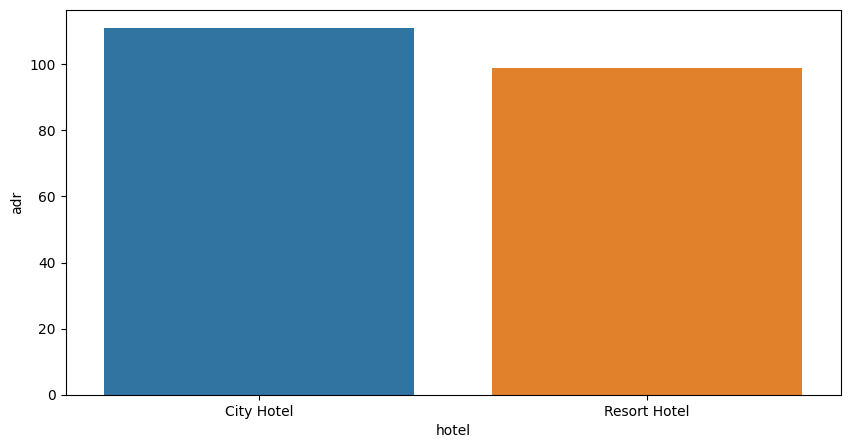

In [145]:
df2=df1.groupby(['hotel'])['adr'].mean().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='hotel',y='adr',data=df2)

In [146]:
#ADR of city hotels are more than Resort Hotel

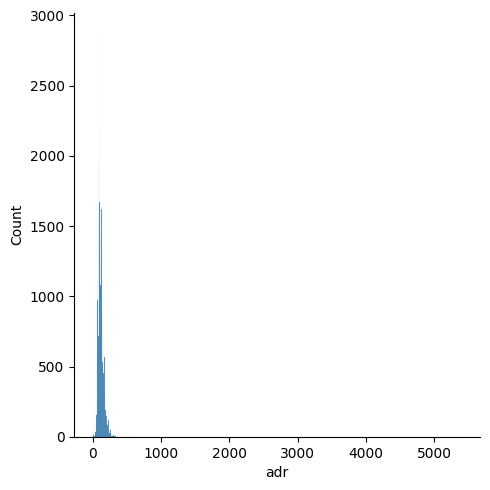

In [147]:
df2=df1[df1['hotel']=='City Hotel']['adr']
sns.displot(df2)

In [148]:
df2=df1[df1['hotel']=='City Hotel']['adr']
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
iqr=q3-q1
df2.describe()

count    53428.000000
mean       110.985944
std         48.062518
min          0.000000
25%         84.000000
50%        105.300000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

In [149]:
df1['adr']=df1['adr'].apply(lambda x:x if x>0 else 0)

In [150]:
df1['adr'].describe()

count    87396.000000
mean       106.337319
std         55.013808
min          0.000000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

In [151]:
q1=df1.adr.quantile(0.25)
q3=df1.adr.quantile(0.75)
iqr=q3-q1
l1=q1-1.5*iqr
l2=q3+1.5*iqr
df1['adr']=df1['adr'].apply(lambda x: x if x>l1 and x<l2 else df1['adr'].median())

In [152]:
df1['adr'].describe()

count    87396.000000
mean       101.651436
std         44.536429
min          0.000000
25%         72.000000
50%         98.100000
75%        129.000000
max        226.950000
Name: adr, dtype: float64

<Axes: xlabel='hotel', ylabel='adr'>

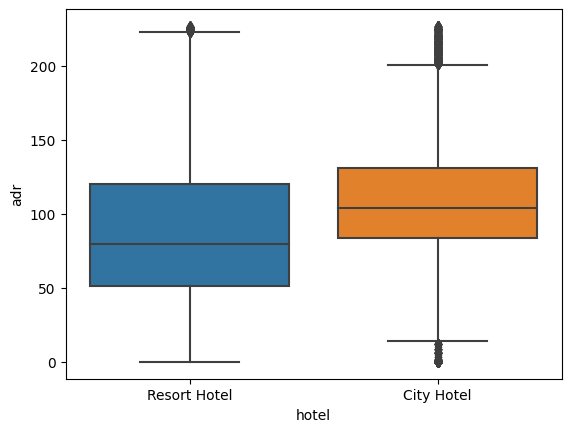

In [153]:
sns.boxplot(x='hotel', y ='adr',data=df1)

In [154]:
#Even with outliers we can observe the median cost of City Hotel are more than Resort Hotel

<Axes: xlabel='customer_type', ylabel='adr'>

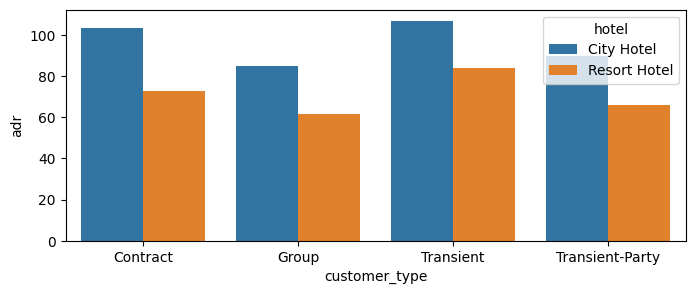

In [155]:
df2=df1.groupby(['customer_type','hotel'])['adr'].median().reset_index()
fig,ax=plt.subplots(figsize=(8,3))
sns.barplot(x='customer_type',y='adr',hue='hotel',data=df2)

In [156]:
#In all types of customer adr of City and Resort is maintained
# Contract and Transient have highest median adr  

In [157]:
df1.groupby('is_canceled')['adr'].median().reset_index()

,is_canceled,adr
0,0,94.5
1,1,105.3


<Axes: xlabel='is_canceled', ylabel='adr'>

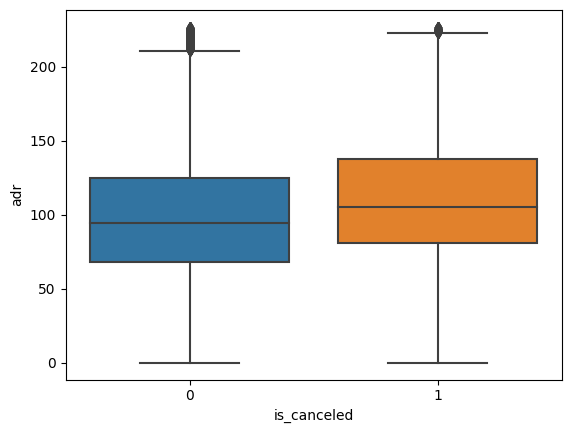

In [158]:

sns.boxplot(x='is_canceled',y='adr',data=df1)

In [159]:
#Seems there is no relation between canceling and adr

In [160]:
df1.groupby('booking_changes_1')['adr'].median()

booking_changes_1
0    98.1
1    96.0
Name: adr, dtype: float64

<Axes: xlabel='booking_changes_1', ylabel='adr'>

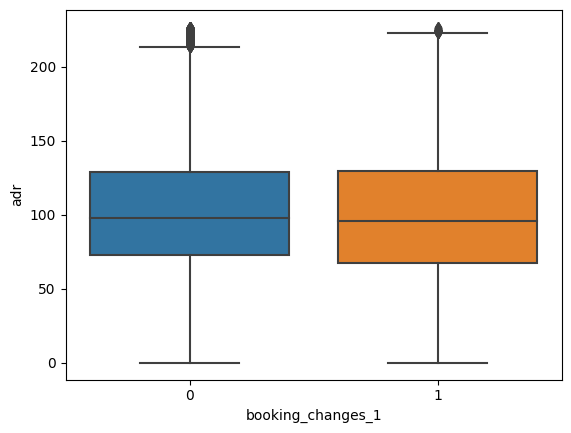

In [161]:
sns.boxplot(x='booking_changes_1',y='adr',data=df1)

In [162]:
#no particuclar trend between adr and booking change

<Axes: xlabel='assigned_room_type', ylabel='adr'>

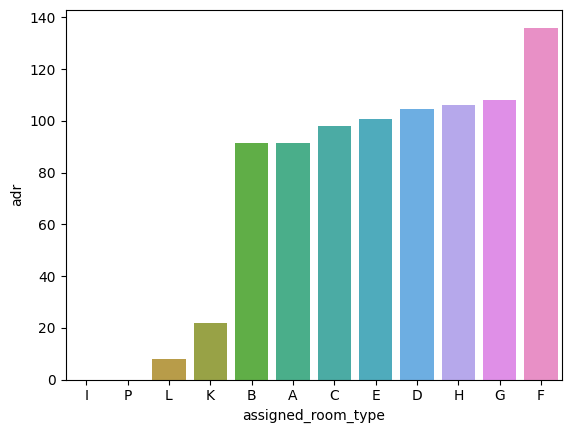

In [163]:
df2=df1.groupby('assigned_room_type')['adr'].median().reset_index().sort_values(by='adr')
sns.barplot(x='assigned_room_type',y='adr',data=df2)

In [164]:
#median adr of Room F is highest but its demand is less.

In [165]:
df1.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,weekend_night,same_room,previous_bookings_not_canceled_1,booking_changes_1
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0,0,1


In [166]:
df1['is_repeated_guest'].value_counts()

0    83981
1     3415
Name: is_repeated_guest, dtype: int64

<Axes: xlabel='is_repeated_guest', ylabel='adr'>

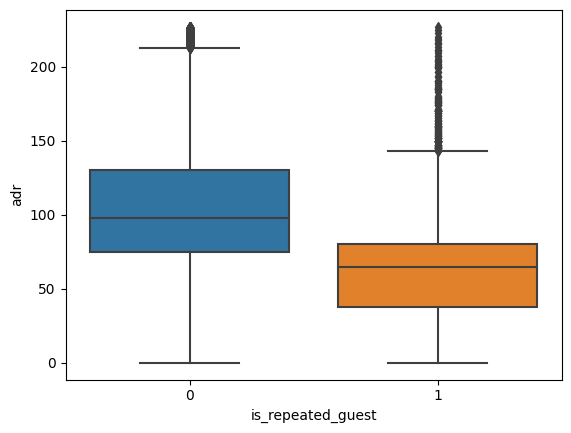

In [167]:
sns.boxplot(x='is_repeated_guest',y='adr',data=df1)

In [168]:
#For repeated guests the median adr is lower

In [169]:
df1['total_stay'].value_counts()

3     17839
1     17184
2     15745
4     13575
7      7527
5      6742
6      3271
10     1076
8      1067
14      862
9       780
0       651
11      370
12      199
13      134
15       72
21       55
28       35
16       33
18       24
19       22
17       20
20       14
25       14
29       14
30       13
22       13
24        6
26        6
35        5
27        5
23        5
42        4
56        2
33        2
46        1
60        1
69        1
45        1
38        1
48        1
49        1
57        1
34        1
43        1
Name: total_stay, dtype: int64

<Axes: xlabel='total_stay', ylabel='Count'>

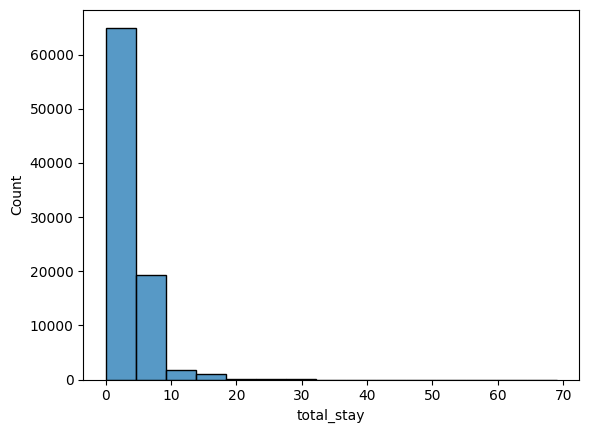

In [170]:
sns.histplot(df1['total_stay'],bins=15)

In [171]:
def mod_total_stay(total_stay):
    if(total_stay<5):
        return 0
    elif(total_stay>=5 and total_stay<=10):
        return 1
    else:
        return 2        

In [172]:
df1['total_stay_mod']=df1['total_stay'].apply(lambda x:mod_total_stay(x))

In [173]:
df1['total_stay_mod'].value_counts()

0    64994
1    20463
2     1939
Name: total_stay_mod, dtype: int64

<Axes: xlabel='total_stay_mod', ylabel='adr'>

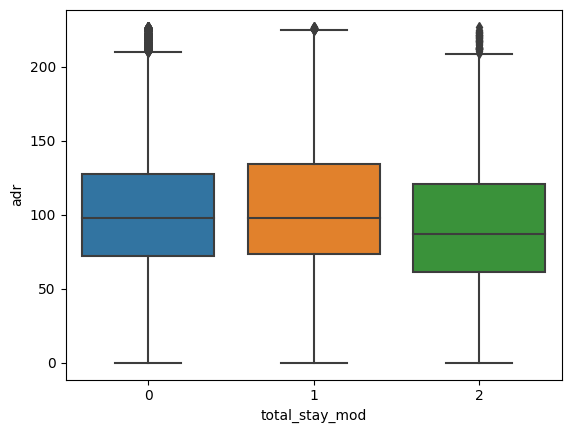

In [174]:
sns.boxplot(x='total_stay_mod',y='adr',data=df1)

In [175]:
#So we can say most total stay are under 5 days. Above 10 are negligible . Trend is if stay is more than 10 days the median adr is slightly less

<Axes: xlabel='total_stay', ylabel='adr'>

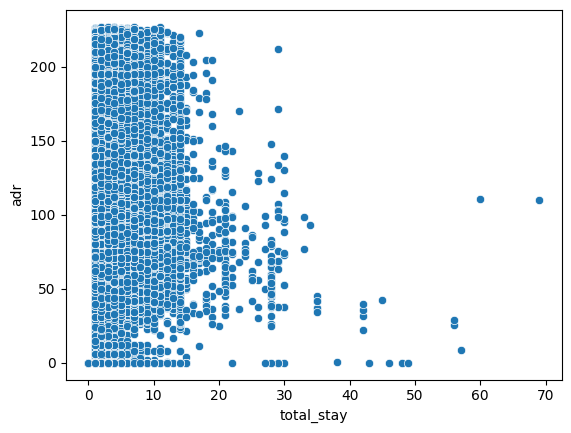

In [176]:
sns.scatterplot(x='total_stay',y='adr',data=df1)

In [177]:
df1['no_weekend_nights']=df1['stays_in_week_nights'].apply(lambda x: x if x<5 else 5)

In [178]:
df1['no_weekend_nights'].value_counts()

1    22191
2    20744
3    16259
5    14153
4     7874
0     6175
Name: no_weekend_nights, dtype: int64

<Axes: xlabel='no_weekend_nights', ylabel='adr'>

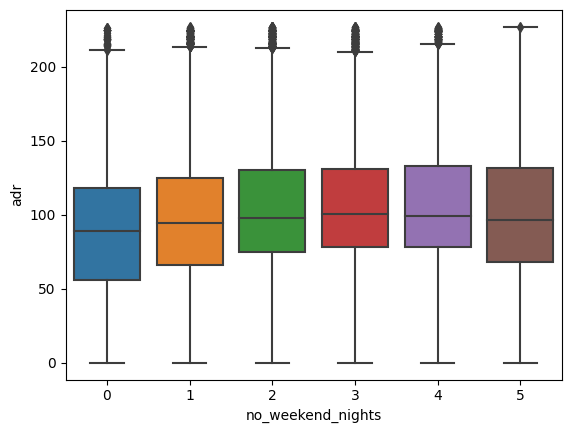

In [179]:
sns.boxplot(x='no_weekend_nights',y='adr',data=df1)

In [180]:
#Slight increase in ADR if weekend nights are stayed in hotel

In [181]:
df1['stays_in_weekend_nights'].value_counts()

0     35151
2     26414
1     22657
4      1734
3      1150
6       113
5        70
8        60
7        15
9        10
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

<Axes: xlabel='arrival_date_year', ylabel='adr'>

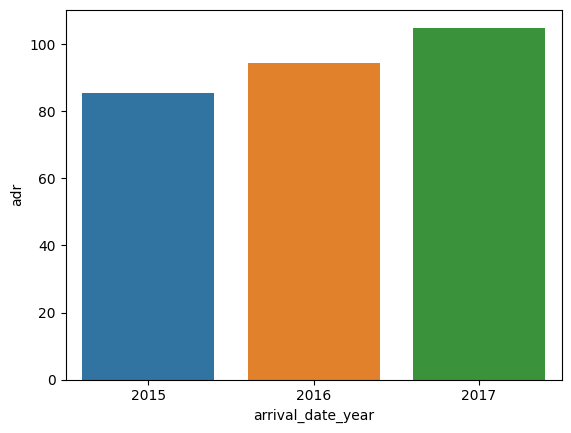

In [182]:
df2=df1.groupby('arrival_date_year')['adr'].median().reset_index()
sns.barplot(x='arrival_date_year',y='adr',data=df2)

In [183]:
# Median ADR is increasing consistently with passage of year 

<Axes: xlabel='arrival_date_year', ylabel='adr'>

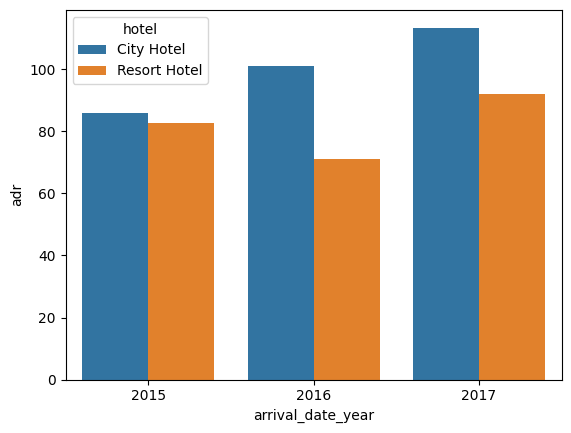

In [184]:
df2=df1.groupby(['arrival_date_year','hotel'])['adr'].median().reset_index()
sns.barplot(x='arrival_date_year',y='adr',hue='hotel',data=df2)

In [ ]:
#There is steady increase of ADR over the years for City hotel .But slight dip for Resort Hotel in 2016. May be demand came down

<Axes: xlabel='arrival_date_month', ylabel='adr'>

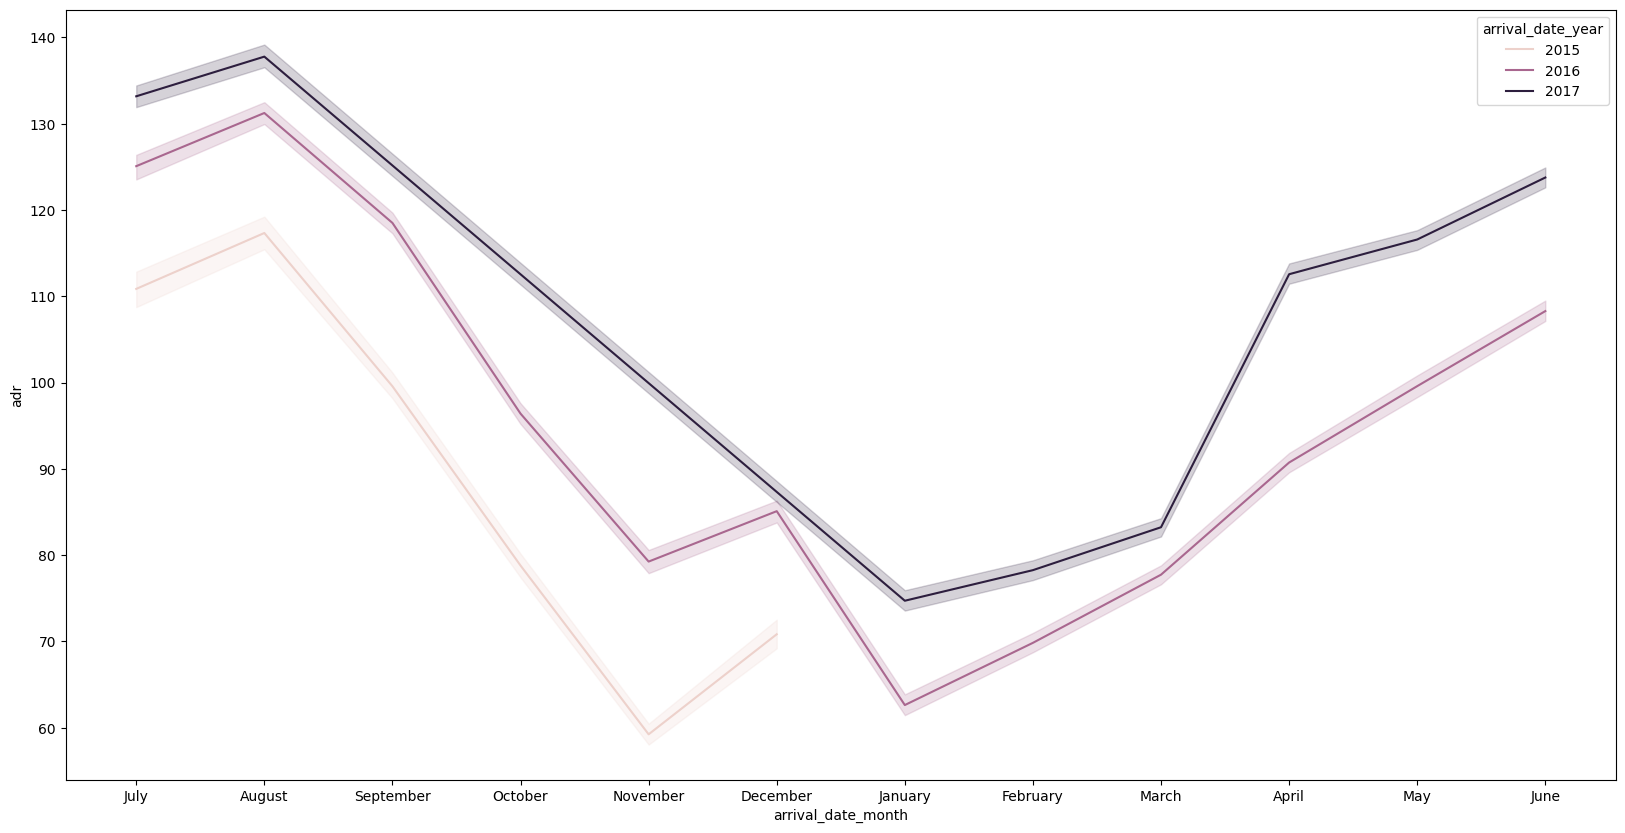

In [196]:
ig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='arrival_date_month',y='adr',hue='arrival_date_year',data=df1)

<Axes: xlabel='arrival_date_month', ylabel='adr'>

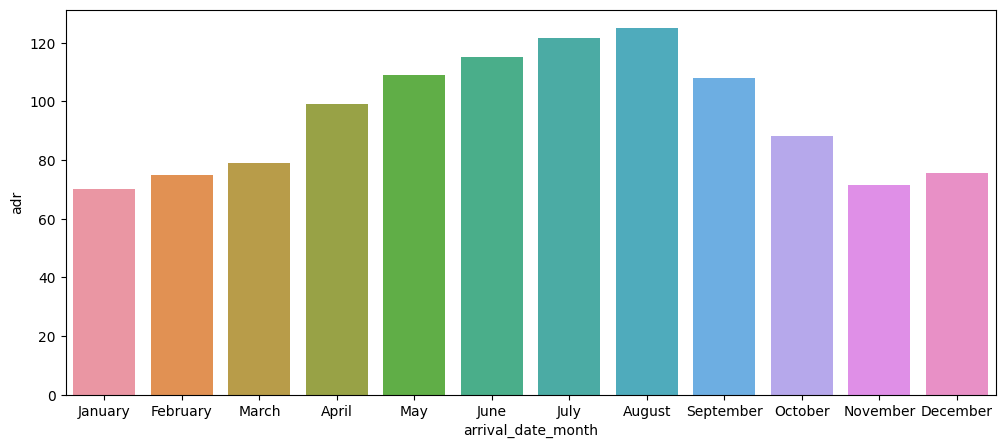

In [186]:
df2=df1.groupby('arrival_date_month')['adr'].median().reset_index()
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x='arrival_date_month',y='adr',data=df2,order=month)

In [187]:
#ADR max in month of Jul,Aug. But then adr falls in winter. Also corroborates with demand variation in the months

<Axes: xlabel='arrival_date_week_number', ylabel='adr'>

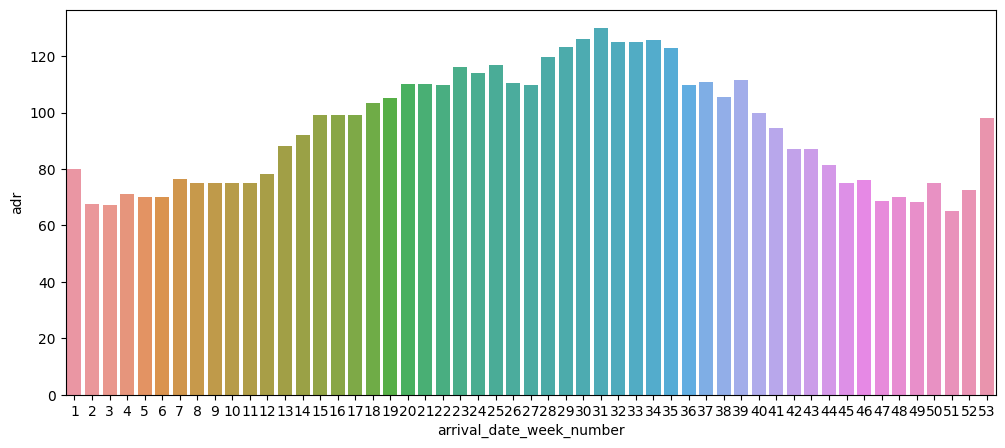

In [188]:
df2=df1.groupby('arrival_date_week_number')['adr'].median().reset_index()
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x='arrival_date_week_number',y='adr',data=df2)

##**Insights/Conclusion/Business Suggestions**


1)More City Hotel Bookings are done in comparison to Resort Hotel<br><br>
2)As per given data hotel booking increased from 2015 to 2016 and then decreased on 2017. Also more percentage  of hotels are cancelled in 2016 and 2017<br><br>

3)Bookings(Arrivals) consistently increased from January and peaked in July(Summer Months) and August .On subsequent months it got reduced
Data is vastly differing over the years. But winter has less demand in each years<br>
**--Rates can be reduced to fill occupancy in winter months**
<br><br>
4)ADR over the years have increased. More ADR during summer months. It reduces during the winter months corroborating with lesser hotels booked in winters
<br><br>
5)No trend between cancellation and weekend staying
<br><br>
6) Highest number of bookings are from Portugal
<br><br>
7)Most of the data fall into market segment of Online TA whether City or Resort Hotel
<br><br>

8)Most reserved room is A .It has the highest demand among customers

   **--More rooms of type A should be introduced in the hotels because of high demand**
<br><br>
9)Repeated guests are very very less in number in comparison to total no of bookings
<br><br>
10)Repeated guests tend to cancel hotel booking lesser compared to non repeated guests

**--More incentives should be given to create more repeated guests as they have lesser trend of cancellations**
<br><br>
11)Most of the hotel bookings are done without any advance payment
<br><br>
12)In City hotel there is slight higher trend of cancellation among Transient Customers
 <br><br>  	
13)Agent 9 has highest bookings. 2-3 agents have more than 10000 bookings. Rest are in range of 1000 and less. Agents are divided into 2-3 bigger players
<br><br>
Agent 9 is specialized more into Hotel Booking. 99% of booking through 9 are of City type 
<br><br>
Agent 240 is specialized more into Resort Booking. 95% of booking through 240 are of Resort type
<br><br>
14)Majority of users prefer BB type meal
<br><br>
HB -though very less but still more preferred in Resort Hotel
BB meal bookings have slightly has less ADR and that's why may be has highest consumption
<br><br>

15)ADR of city hotels are more than Resort Hotel
there is no relation between canceling and adr
<br><br>

16)Median adr of Room F is highest but its demand is less.

<br><br>
17)For repeated guests the median adr is lower
<br><br>
18) Most number of total stays are under 5 days. Above 10 are negligible . Trend is if stay is more than 10 days the median adr is slightly less
<br><br>

19)Slight increase in ADR if weekend nights are stayed in hotel

Median ADR is increasing consistently with passage of year 


